# **Introduction**

##Background Information on the Problem Statement
The rapid advancement of large language models (LLMs), such as GPT-3 and its successors like GPT-4, has revolutionized the field of natural language processing (NLP). These models can generate human-like text with unprecedented fluency, coherence, and contextual awareness, making them invaluable tools for a wide range of applications, including content creation, language translation, and automated customer service. However, this technological breakthrough also brings forth significant concerns regarding the potential misuse of AI-generated text.

As LLMs become more accessible and their use more widespread, the ability to distinguish between human-written and machine-generated text has become an urgent need. The proliferation of AI-generated content poses risks such as misinformation, plagiarism, and the erosion of trust in digital communications. Therefore, developing robust techniques for accurately detecting AI-generated text is crucial to mitigate these risks and ensure the responsible use of LLMs.

The "LLM Detect AI Generated Text" competition hosted by Kaggle addresses this pressing challenge. By providing a dataset comprising a mixture of human-written and LLM-generated text samples, the competition encourages participants to develop machine learning models that can accurately classify each text sample as either human-written or AI-generated. This endeavor not only helps in building safeguards against the misuse of AI technologies but also advances the field of NLP by pushing the boundaries of what these models can achieve.

##Clear Definition of the Problem
The primary objective of this project is to develop a highly accurate and robust model capable of distinguishing between human-written text and text generated by large language models (LLMs) such as GPT-4. Achieving this involves leveraging cutting-edge machine learning techniques, with a particular focus on natural language processing (NLP) and deep learning methodologies, to analyze and discern the linguistic patterns and characteristics inherent in the text samples provided.

To enhance the robustness of our model, we will consider expanding the dataset with additional samples and perform thorough Exploratory Data Analysis (EDA). This process will help us gain deeper insights into the data, revealing underlying patterns and characteristics that can inform our modeling approach. The findings from the EDA will be meticulously analyzed and presented within this notebook.

The model must be adept at identifying subtle differences between human and AI-generated text, considering various dimensions such as coherence, fluency, contextual relevance, and stylistic nuances. Furthermore, it should be capable of handling the complexities and intricacies of natural language, including idiomatic expressions, metaphors, and cultural references, which are often challenging for LLMs to emulate accurately.

Another critical aspect of the model is its ability to generalize well to unseen data, ensuring its effectiveness in real-world applications involving LLM-generated text. This necessitates a careful examination of potential biases and limitations in the training data, alongside employing robust evaluation techniques to measure the model's performance across diverse and representative test sets.

##Importance and Relevance of the Task
As large language models (LLMs) continue to evolve and find applications across various industries and domains, the ability to detect AI-generated text is becoming increasingly vital for maintaining trust, transparency, and accountability. In academic and research settings, accurate detection of AI-generated text is essential for upholding the integrity of scholarly work, preventing plagiarism, and ensuring adherence to principles of academic honesty and ethical conduct.

In legal and financial sectors, where the authenticity and provenance of documents are paramount, the capability to identify AI-generated text can play a crucial role in preventing fraudulent activities, such as contract forgery, identity theft, and other forms of deception involving AI-generated content. This ability is critical for maintaining the integrity of legal and financial transactions.

Furthermore, the detection of AI-generated text has significant implications for content moderation and online safety. As LLMs grow more sophisticated, there is a heightened risk of their misuse in generating and disseminating misinformation, hate speech, and other harmful content on a large scale. Developing accurate detection models can help in identifying and curbing the spread of such content, thereby fostering a safer and more trustworthy online environment.

Beyond these specific applications, the development of effective models for detecting AI-generated text contributes to ongoing research in NLP and artificial intelligence. It enhances our understanding of language models, their capabilities, and their limitations, promoting more responsible and ethical use of these powerful technologies.

##Description of the Data and Technical Challenges
The dataset provided for this competition consists of a diverse collection of text samples, some written by humans and others generated by large language models (LLMs). Human-written texts cover a wide range of topics and styles, reflecting the natural variability and richness of human language. In contrast, LLM-generated texts are produced by advanced AI models, which, despite their sophistication, often exhibit subtle yet detectable differences in structure, coherence, and style compared to human-authored texts.

One of the primary challenges in this project is the inherent similarity between human-written and AI-generated text. As LLMs have improved, their output has become increasingly indistinguishable from human writing. This makes the task of classification particularly difficult, requiring models that can capture and analyze minute differences and patterns that might not be immediately apparent.

Additionally, the dataset may contain biases introduced by the LLMs during text generation, as well as biases present in the human-written texts. Identifying and mitigating these biases is crucial for developing fair and unbiased models. Another challenge is the potential overfitting of models to specific patterns in the training data, which can limit their ability to generalize to new, unseen data.

Technical challenges also include handling the nuances and complexities of natural language. This involves accounting for idiomatic expressions, metaphors, cultural references, and varying linguistic styles, all of which can impact the performance of the detection model. Moreover, the computational requirements for training sophisticated NLP models, particularly those based on deep learning, can be substantial, necessitating efficient use of resources and optimization techniques.

By addressing these challenges, this project aims to develop a model that not only achieves high accuracy in distinguishing between human-written and AI-generated text but also provides insights into the broader implications of AI-generated content and its detection.



# IMPORT

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"  # "jax" or "tensorflow" or "torch"

# Install necessary packages (you may want to run this separately)
#!pip install torch tensorflow numpy pandas matplotlib seaborn nltk wordcloud scikit-learn pyarrow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Torch import
import torch

# Standard data science imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# NLTK imports
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.util import ngrams

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('vader_lexicon', quiet=True)

# Other imports
import string
import re
from collections import Counter
from wordcloud import WordCloud

# Scikit-learn imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder


# Colormap
cmap = mpl.cm.get_cmap('coolwarm')

# **Data Collection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define the path to save the files in Google Drive
drive_path = '/content/drive/My Drive/AI Generated Text/'

Mounted at /content/drive


Load data

In [ ]:
kaggle_path = '/content/drive/My Drive/AI Generated Text/kaggle Datasets/'

train_essays = pd.read_csv(kaggle_path + 'train_essays.csv')
train_prompts = pd.read_csv(kaggle_path + 'train_prompts.csv')
test_essays = pd.read_csv(kaggle_path + 'test_essays.csv')
sample_submission = pd.read_csv(kaggle_path + 'sample_submission.csv')

Mounted at /content/drive


In [ ]:
print('train_essays Info:' + '\n' + '-' * 30)
print(train_essays.info())

print('\ntrain_prompts Info:' + '\n' + '-' * 30)
print(train_prompts.info())

print('\ntest_essays Info:' + '\n' + '-' * 30)
print(test_essays.info())

print('\nsample_submission Info:' + '\n' + '-' * 30)
print(sample_submission.info())

train_essays Info:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB
None

train_prompts Info:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes
None

test_essays Info:
------------------------------
<class 'pandas.core.frame.DataFrame'>
Ra

# **Exploratory Data Analysis (EDA)**

In this section, we outline the key components of our project, including the original training data from Kaggle, the external datasets we will use to enhance our model, the preprocessing steps to prepare the data, and the exploratory data analysis (EDA) to understand the data better.

## EDA Kaggle data


In [ ]:
# Display the first few rows of each dataset to understand their structure
print("Train Essays:\n", train_essays.head(), "\n")

# Summary statistics for train essays
print("Train Essays Statistics:\n", train_essays.describe(), "\n")

# Check for missing values in train essays
print("Train Essays Missing Values:\n", train_essays.isnull().sum())

Train Essays:
          id  prompt_id                                               text  \
0  0059830c          0  Cars. Cars have been around since they became ...   
1  005db917          0  Transportation is a large necessity in most co...   
2  008f63e3          0  "America's love affair with it's vehicles seem...   
3  00940276          0  How often do you ride in a car? Do you drive a...   
4  00c39458          0  Cars are a wonderful thing. They are perhaps o...   

   generated  essay_length  
0          0           584  
1          0           462  
2          0           744  
3          0           686  
4          0           871   

Train Essays Statistics:
          prompt_id    generated  essay_length
count  1378.000000  1378.000000   1378.000000
mean      0.486212     0.002177    556.124093
std       0.499991     0.046625    159.920005
min       0.000000     0.000000    235.000000
25%       0.000000     0.000000    447.000000
50%       0.000000     0.000000    525.00000

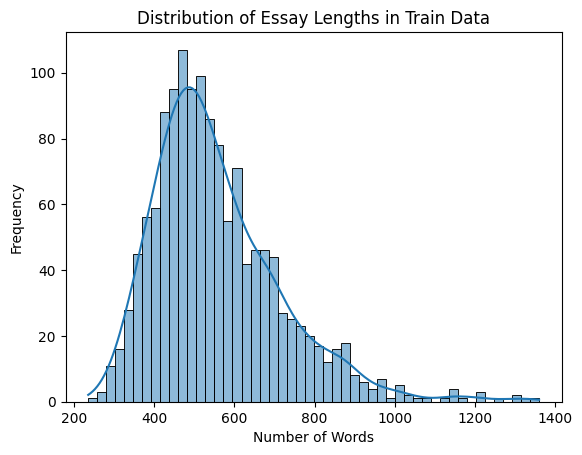

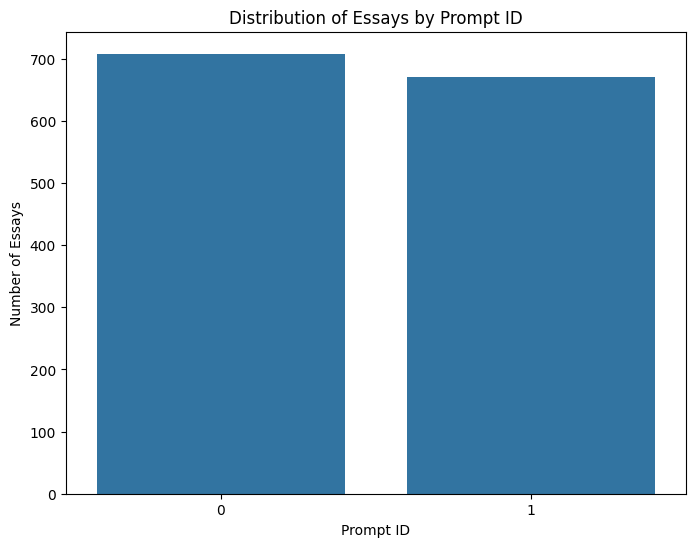

In [ ]:
# Visualize the distribution of essay lengths in the train dataset
train_essays['essay_length'] = train_essays['text'].apply(lambda x: len(str(x).split()))
sns.histplot(train_essays['essay_length'], bins=50, kde=True)
plt.title('Distribution of Essay Lengths in Train Data')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Explore the relationship between prompts and essays
plt.figure(figsize=(8, 6))
sns.countplot(x='prompt_id', data=train_essays)
plt.title('Distribution of Essays by Prompt ID')
plt.xlabel('Prompt ID')
plt.ylabel('Number of Essays')
plt.show()


The training data shows a variety of essay lengths but is limited to only two prompts. In contrast, the test data uses seven prompts, highlighting the need for a more diverse training set to ensure model generalization.

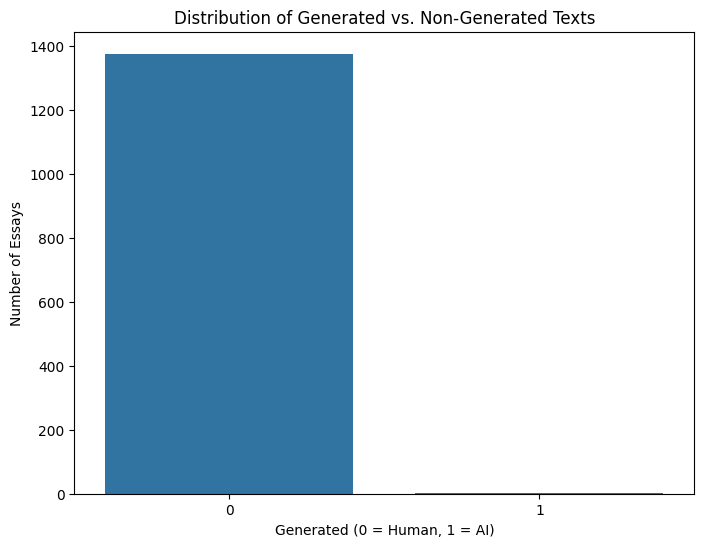

In [ ]:
# Visualize the number of generated and non-generated texts
plt.figure(figsize=(8, 6))
sns.countplot(x='generated', data=train_essays)
plt.title('Distribution of Generated vs. Non-Generated Texts')
plt.xlabel('Generated (0 = Human, 1 = AI)')
plt.ylabel('Number of Essays')
plt.show()

## Data issue - why we add external data
The dataset provided by Kaggle consists predominantly of human-written text. To achieve our goal of distinguishing between human-made and AI-generated text, we require a dataset that includes both. After reviewing the Kaggle competition page, we discovered that this issue has been identified by others as well. Many users have already created and shared datasets containing text generated by various AI models.

We will integrate the original Kaggle data with these external datasets to create a more comprehensive dataset suitable for training our model.

###Collect External Data

In [ ]:
external_path = '/content/drive/My Drive/AI Generated Text/External Datasets/'
argugpt = pd.read_csv(external_path + 'argugpt.csv')
train_drcat_04 = pd.read_csv(external_path + 'train_drcat_04.csv')
train_drcat_03 = pd.read_csv(external_path + 'train_drcat_03.csv')
train_drcat_02 = pd.read_csv(external_path + 'train_drcat_02.csv')
train_drcat_01 = pd.read_csv(external_path + 'train_drcat_01.csv')

In [ ]:
print('argugpt Info:' + '\n' + '-' * 30)
print(argugpt.info())

print('\ntrain_drcat_04 Info:' + '\n' + '-' * 30)
print(train_drcat_04.info())

print('\ntrain_drcat_03 Info:' + '\n' + '-' * 30)
print(train_drcat_03.info())

print('\ntrain_drcat_02 Info:' + '\n' + '-' * 30)
print(train_drcat_02.info())

print('\ntrain_drcat_01 Info:' + '\n' + '-' * 30)
print(train_drcat_01.info())

argugpt Info:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4038 non-null   object 
 1   prompt_id    4038 non-null   object 
 2   prompt       4038 non-null   object 
 3   text         4038 non-null   object 
 4   model        4038 non-null   object 
 5   temperature  4038 non-null   float64
 6   exam_type    4038 non-null   object 
 7   score        4038 non-null   int64  
 8   score_level  4038 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 284.0+ KB
None

train_drcat_04 Info:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44206 entries, 0 to 44205
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   essay_id  44206 non-null  object
 1   text      44206 non-null  object
 2   

##EDA External Data

Combine all train_drcat files into a single DataFrame


In [ ]:
# Combine all train_drcat files into a single DataFrame
train_drcat_combined = pd.concat([train_drcat_01, train_drcat_02, train_drcat_03, train_drcat_04], ignore_index=True)

In [ ]:
train_drcat_combined.rename(columns = {"label":"generated"}, inplace=True)
train_drcat_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159456 entries, 0 to 159455
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       159456 non-null  object
 1   generated  159456 non-null  int64 
 2   source     159456 non-null  object
 3   fold       159456 non-null  int64 
 4   essay_id   126197 non-null  object
 5   prompt     34312 non-null   object
dtypes: int64(2), object(4)
memory usage: 7.3+ MB


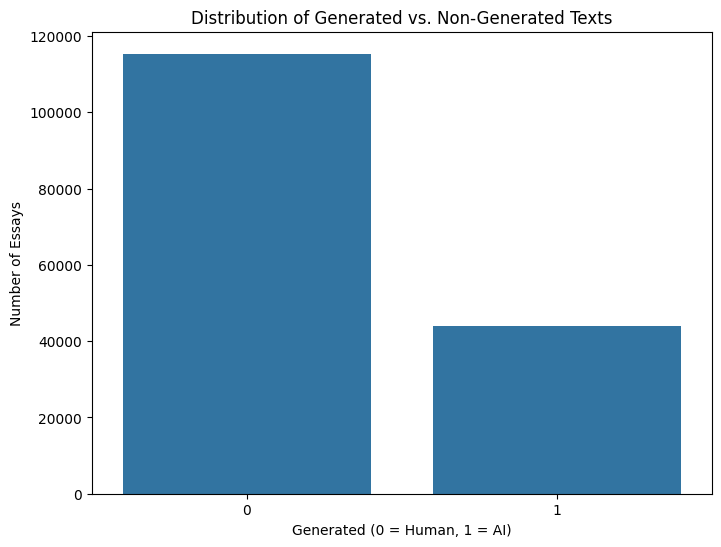

In [ ]:
# Visualize the number of generated and non-generated texts
plt.figure(figsize=(8, 6))
sns.countplot(x='generated', data=train_drcat_combined)
plt.title('Distribution of Generated vs. Non-Generated Texts')
plt.xlabel('Generated (0 = Human, 1 = AI)')
plt.ylabel('Number of Essays')
plt.show()

The argugpt dataset contains generated text without any labels. To integrate it with other external datasets, we will add a 'generated' column with a value of 1 for each row, indicating that the text is AI-generated.

In [ ]:
argugpt['generated'] = 1

In [ ]:
argugpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4038 non-null   object 
 1   prompt_id    4038 non-null   object 
 2   prompt       4038 non-null   object 
 3   text         4038 non-null   object 
 4   model        4038 non-null   object 
 5   temperature  4038 non-null   float64
 6   exam_type    4038 non-null   object 
 7   score        4038 non-null   int64  
 8   score_level  4038 non-null   object 
 9   generated    4038 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 315.6+ KB


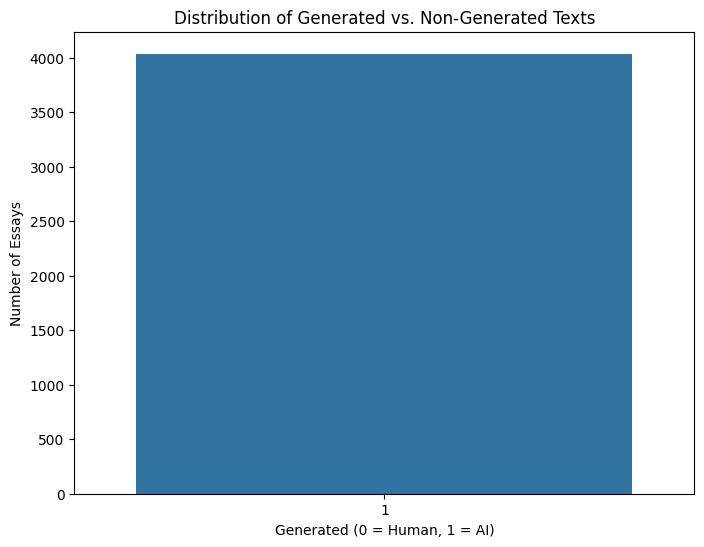

In [ ]:
# Visualize the number of generated and non-generated texts
plt.figure(figsize=(8, 6))
sns.countplot(x='generated', data=argugpt)
plt.title('Distribution of Generated vs. Non-Generated Texts')
plt.xlabel('Generated (0 = Human, 1 = AI)')
plt.ylabel('Number of Essays')
plt.show()


##Combine Kaggle's Data Set with the External Data Set into a single Multiple Data Set


In [ ]:
data = pd.concat([train_drcat_combined[["text", "generated"]], argugpt[["text", "generated"]], train_essays[["text", "generated"]]])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164872 entries, 0 to 1377
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       164872 non-null  object
 1   generated  164872 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ MB


###Save the Multiple essays with the columns: **['text' , 'generated']**

In [ ]:
data.to_parquet(drive_path + 'multiple_essays.parquet', index=False)


We saved the dataset to facilitate working with it more efficiently. By saving the cleaned and processed dataset, we can directly perform EDA and build models without the need to reconstruct the dataset each time, thus streamlining the workflow and saving time.

In [ ]:
data = pd.read_parquet(drive_path + 'multiple_essays.parquet')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164872 entries, 0 to 164871
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       164872 non-null  object
 1   generated  164872 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


## EDA and Preprocessing Multiple Data Set

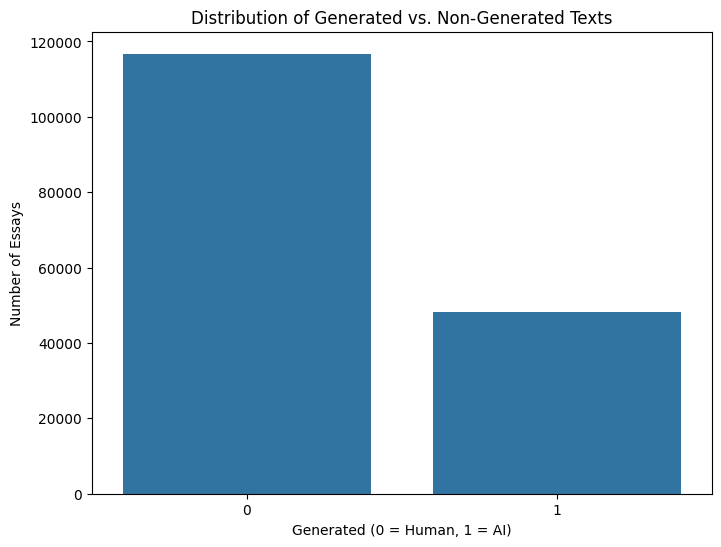

In [ ]:
# Visualize the number of generated and non-generated texts
plt.figure(figsize=(8, 6))
sns.countplot(x='generated', data=data)
plt.title('Distribution of Generated vs. Non-Generated Texts')
plt.xlabel('Generated (0 = Human, 1 = AI)')
plt.ylabel('Number of Essays')
plt.show()

### Text Cleaning

In [ ]:
# Function to clean text
def clean_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])
    return text

# Apply text cleaning
data['cleaned_text'] = data['text'].apply(clean_text)
print("Cleaned Text Data:\n", data['cleaned_text'])

Cleaned Text Data:
 0         alot reasons keep despised method choosing pre...
1         driving smart cars drive themself pros cons pe...
2         dear principal believe students school allowed...
3         dear principal community service required stud...
4         argument development driverless cars cars allo...
                                ...                        
164867    fuss elector college many people get confused ...
164868    limiting car usage many advantages putting lot...
164869    theres new trend developing years soon full th...
164870    know cars big part society today however cars ...
164871    cars around since popular ever since although ...
Name: cleaned_text, Length: 164872, dtype: object


In [ ]:
# Function to find removed stop words
def find_removed_stop_words(original_text, cleaned_text):
    original_words = set(original_text.lower().split())
    cleaned_words = set(cleaned_text.split())
    removed_words = original_words - cleaned_words
    return removed_words

# Apply the function to the first few rows of the dataset
data['removed_stop_words'] = data.apply(lambda row: find_removed_stop_words(row['text'], row['cleaned_text']), axis=1)

# Display the original text, cleaned text, and removed stop words for the first few rows
data[['text', 'cleaned_text', 'removed_stop_words']].head()


,text,cleaned_text,removed_stop_words
0,There are alot reasons to keep our the despise...,alot reasons keep despised method choosing pre...,"{his, to, ""it, a, '68, state,, romney..., ""ric..."
1,Driving smart cars that drive by themself has ...,driving smart cars drive themself pros cons pe...,"{now, to,, fuel,, wrecks., to, to?, drivers., ..."
2,"Dear Principal,\n\nI believe that students at ...",dear principal believe students school allowed...,"{has, which, them, at, noise,, with, grades., ..."
3,"Dear Principal,\n\nCommunity service should no...",dear principal community service required stud...,"{own, to, can, a, they, their, forced., are, r..."
4,My argument for the development of the driverl...,argument development driverless cars cars allo...,"{lives., world., environment., to, can, a, the..."


### Tokenize the texts
Tokenization is the process of breaking down a piece of text into smaller units called tokens. These tokens can be words, phrases, or even characters. Tokenization is a fundamental step in natural language processing (NLP) and text analysis because it converts unstructured text into a structured format that can be more easily analyzed and processed by machine learning algorithms.  
By breaking text into tokens, it becomes easier to apply other preprocessing steps such as lowercasing, removing punctuation, and filtering out stop words.

For the purpose of understanding and diving into the data, we will look at both the clean data and the original data.

In [ ]:
# Tokenize the cleaned texts
data['cleaned_tokens'] = data['cleaned_text'].apply(nltk.word_tokenize)
print("Tokenized Text Data:\n", data[['cleaned_text', 'cleaned_tokens']])

# Tokenize the original texts
data['tokens'] = data['text'].apply(nltk.word_tokenize)
print("Tokenized Text Data:\n", data[['text', 'tokens']])



Tokenized Text Data:
                                              cleaned_text  \
0       alot reasons keep despised method choosing pre...   
1       driving smart cars drive themself pros cons pe...   
2       dear principal believe students school allowed...   
3       dear principal community service required stud...   
4       argument development driverless cars cars allo...   
...                                                   ...   
164867  fuss elector college many people get confused ...   
164868  limiting car usage many advantages putting lot...   
164869  theres new trend developing years soon full th...   
164870  know cars big part society today however cars ...   
164871  cars around since popular ever since although ...   

                                           cleaned_tokens  
0       [alot, reasons, keep, despised, method, choosi...  
1       [driving, smart, cars, drive, themself, pros, ...  
2       [dear, principal, believe, students, school, a...  
3    

### Save data

In [ ]:
data.to_parquet(drive_path + 'multiple_essays&cleaned_text&tokens.parquet', index=False)


load data

In [ ]:
data = pd.read_parquet(drive_path + 'multiple_essays&cleaned_text&tokens.parquet')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164872 entries, 0 to 164871
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   text            164872 non-null  object
 1   generated       164872 non-null  int64 
 2   cleaned_text    164872 non-null  object
 3   cleaned_tokens  164872 non-null  object
 4   tokens          164872 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.3+ MB


### Most Common Words
Tokenization allows us to calculate the frequency of a word, which is useful for text classification and sentiment analysis.  
The most common words in the original text include many stop words such as "the", "to", "and", "a", "of", etc., which are frequent but not informative for text analysis tasks. In contrast, the cleaned text show more meaningful words that carry actual information, as the stop words and punctuation have been removed.  
By comparing the most frequent words in the original and cleaned text, we can clearly see the impact of stop words and why text cleaning is essential.     This approach highlights how removing stop words and other noise leads to more meaningful and relevant features for subsequent analysis and modeling.


**What We Will Gain From This Insights?**
Understanding the most common words used in both original and cleaned text data can provide valuable insights into the themes and topics prevalent in the dataset. This analysis helps in identifying frequent terms and understanding the overall content structure, which is crucial for further text processing and modeling tasks.

**Which Technology (Frameworks and etc) We Used?**
For this analysis, we utilized the following technologies:

Pandas: For data manipulation and handling the DataFrame.
Matplotlib and Seaborn: For creating visualizations to display the most common words.
Collections (Counter): For counting the frequency of words efficiently.

**Issues We Had in the Way Till Managed to Implement It**
Initially, we faced issues with counting and visualizing the words correctly due to the way tokens were stored as strings. We resolved this by ensuring that the tokens were properly exploded into individual words. Additionally, handling large datasets and ensuring the visualizations were clear and informative required careful plotting and formatting.

####Most Commom Words in Original and Cleaned Texts

In [ ]:
# Original Texts Tokens
all_tokens = [token for tokens in data['tokens'] for token in tokens] # Flatten the list of tokens
word_freq = Counter(all_tokens) # Count word frequencies
most_common_words = word_freq.most_common(50) # Get the 50 most common words
words, counts = zip(*most_common_words) # Separate words and their counts for plotting


# Cleaned Text Tokens
cleaned_all_tokens = [token for tokens in data['cleaned_tokens'] for token in tokens]
cleaned_word_freq = Counter(cleaned_all_tokens)
cleaned_most_common_words = cleaned_word_freq.most_common(50)
cleaned_words, cleaned_counts = zip(*cleaned_most_common_words)

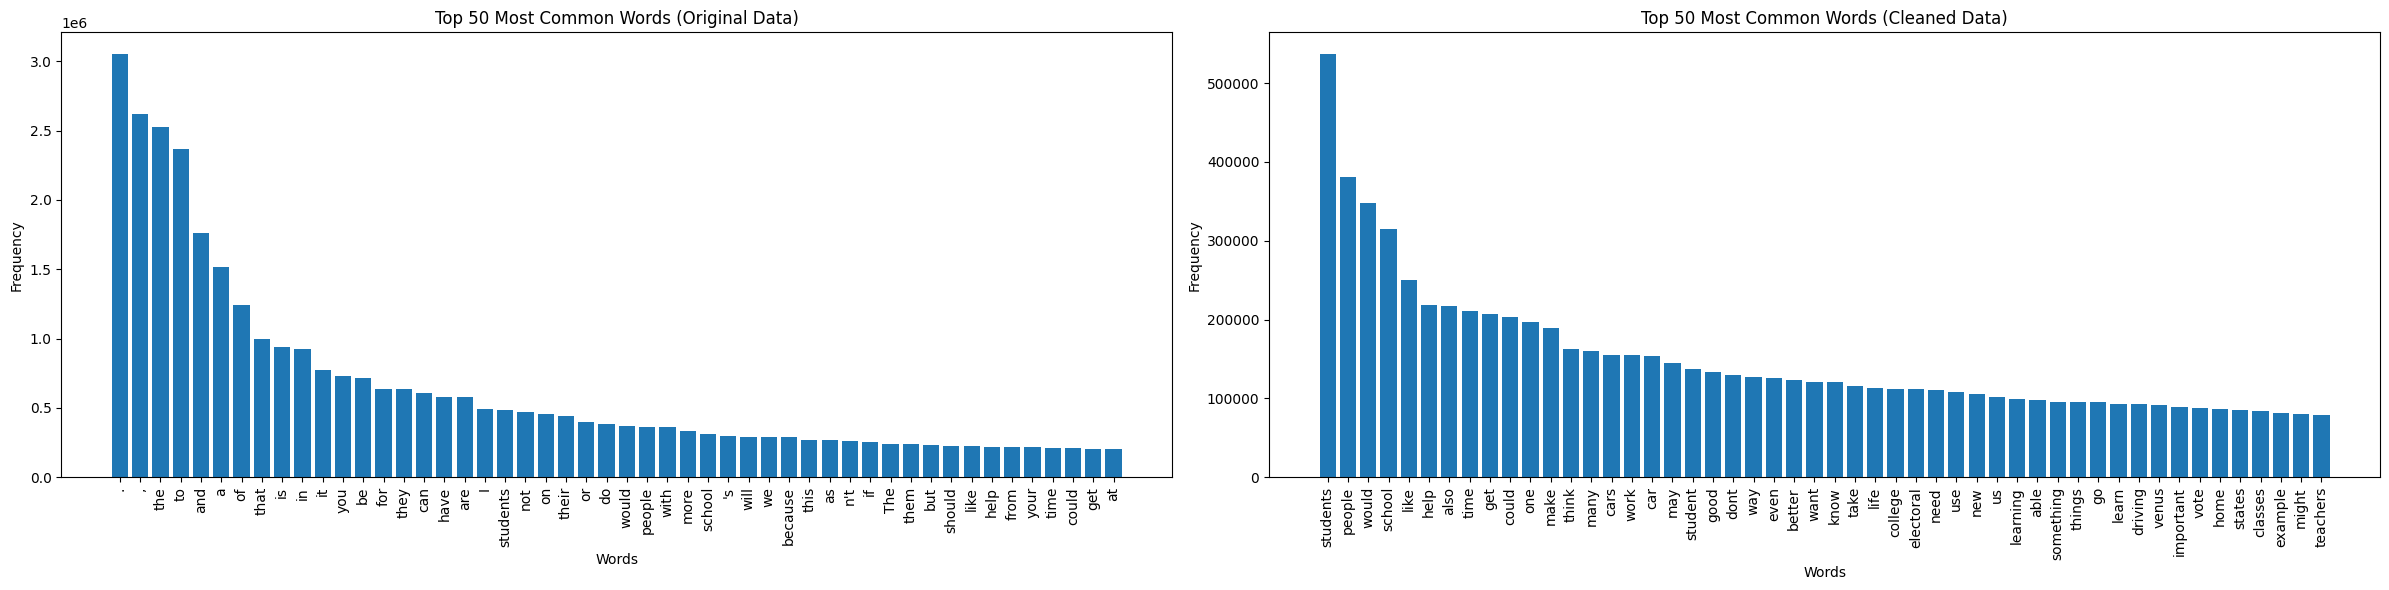

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24, 6)) # Plot the most common words

# Plot the most common words (original)
axes[0].bar(words, counts)
axes[0].set_title('Top 50 Most Common Words (Original Data)')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=90)

# Plot the most common words (cleaned data)
axes[1].bar(cleaned_words, cleaned_counts)
axes[1].set_title('Top 50 Most Common Words (Cleaned Data)')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=90)

# Show the plots
plt.tight_layout()
plt.show()

As seen in the original data, there are numerous values that hold little significance for our analysis, such as stop words, punctuation, and irrelevant symbols. By cleaning the data, we remove these extraneous elements, allowing us to focus on the meaningful content and gain more accurate insights from our exploratory data analysis (EDA).

####Most Common Words in the cleaned data by label
By choosing to analyze the most common words only on the cleaned data, we ensure that our analysis is focused on the most relevant and informative parts of the text.

In [ ]:
# Count word frequencies by label
def get_most_common_words_by_label(data, label_column, token_column, num_words=30):
    label_groups = data.groupby(label_column)
    most_common_words_by_label = {}
    for label, group in label_groups:
        tokens = [token for tokens in group[token_column] for token in tokens]
        word_freq = Counter(tokens)
        most_common_words_by_label[label] = word_freq.most_common(num_words)
    return most_common_words_by_label

# Get the most common words for cleaned text by label
most_common_cleaned_words_by_label = get_most_common_words_by_label(data, 'generated', 'cleaned_tokens')

# print("Most Common Words in Cleaned Text by Label:\n", most_common_cleaned_words_by_label)


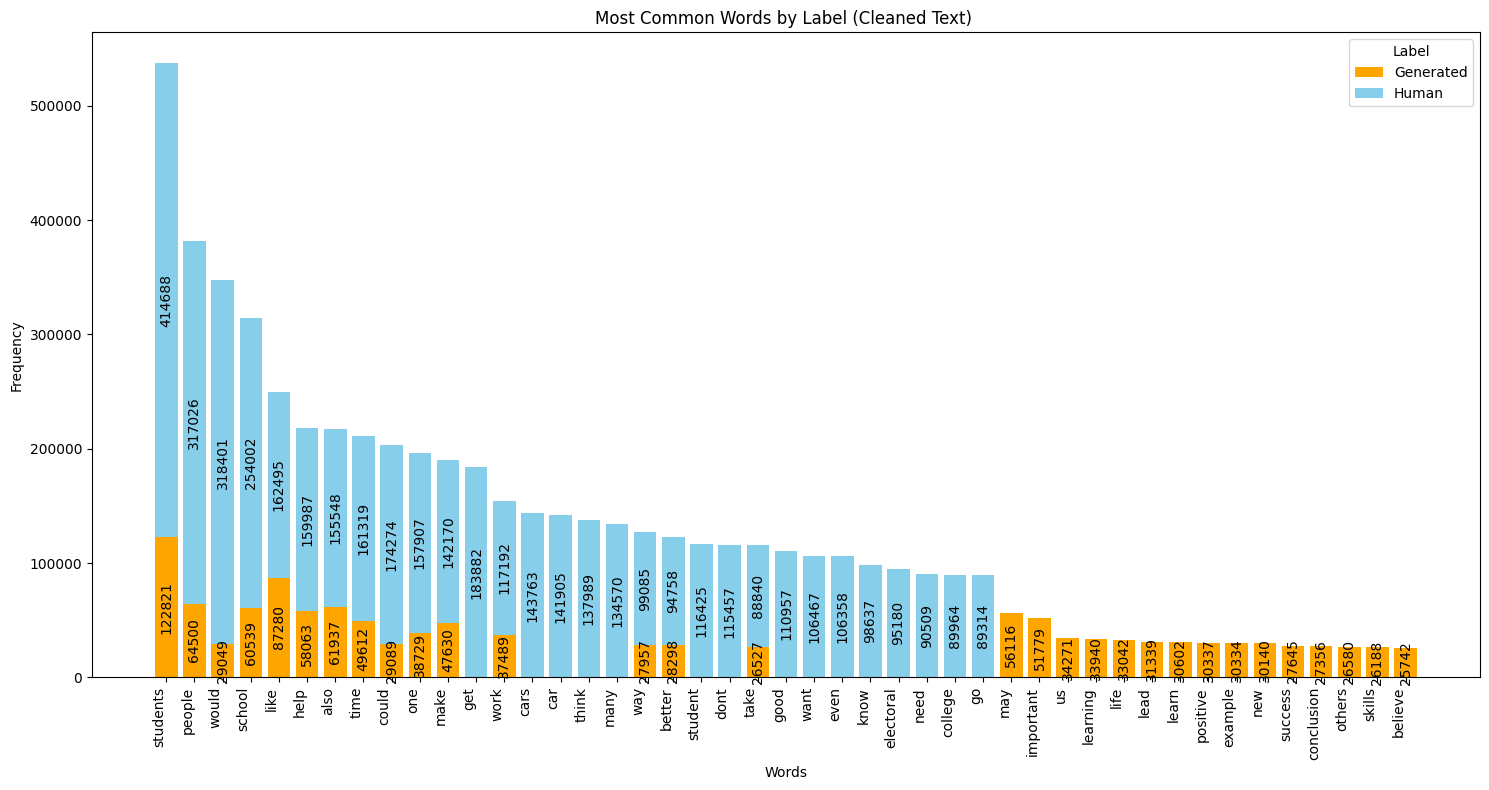

In [ ]:
# Combine the data into a single DataFrame
combined_data = []
for label, common_words in most_common_cleaned_words_by_label.items():
    for word, count in common_words:
        combined_data.append({'label': label, 'word': word, 'count': count})

df_combined = pd.DataFrame(combined_data)
#print(df_combined)

# Mapping labels
label_mapping = {0: 'Human', 1: 'Generated'}
df_combined['label'] = df_combined['label'].map(label_mapping)

# Prepare the data for plotting
plot_data = df_combined.pivot(index='word', columns='label', values='count').fillna(0)
plot_data = plot_data.reindex(plot_data.sum(axis=1).sort_values(ascending=False).index)  # Sort by total count
all_common_words = plot_data.index
labels = plot_data.columns

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
word_positions = range(len(all_common_words))
colors = ['orange', 'skyblue']

# Plot stacked bars for each label
for i, label in enumerate(labels):
    ax.bar(word_positions, plot_data[label],
           color=colors[i], label=f'{label}',
           bottom=plot_data[labels[:i]].sum(axis=1))

# Annotate each bar with the count value
for i, word in enumerate(all_common_words):
    for j, label in enumerate(labels):
        count = plot_data.loc[word, label]
        if count > 0:
            ax.text(i, plot_data[labels[:j]].sum(axis=1).iloc[i] + count / 2, int(count),
                    ha='center', va='center', rotation=90, fontsize=10, color='black')

# Customize the plot
ax.set_xticks(word_positions)
ax.set_xticklabels(all_common_words, rotation=90, ha='right')
ax.set_title('Most Common Words by Label (Cleaned Text) ')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.legend(title='Label')

plt.tight_layout()
plt.show()

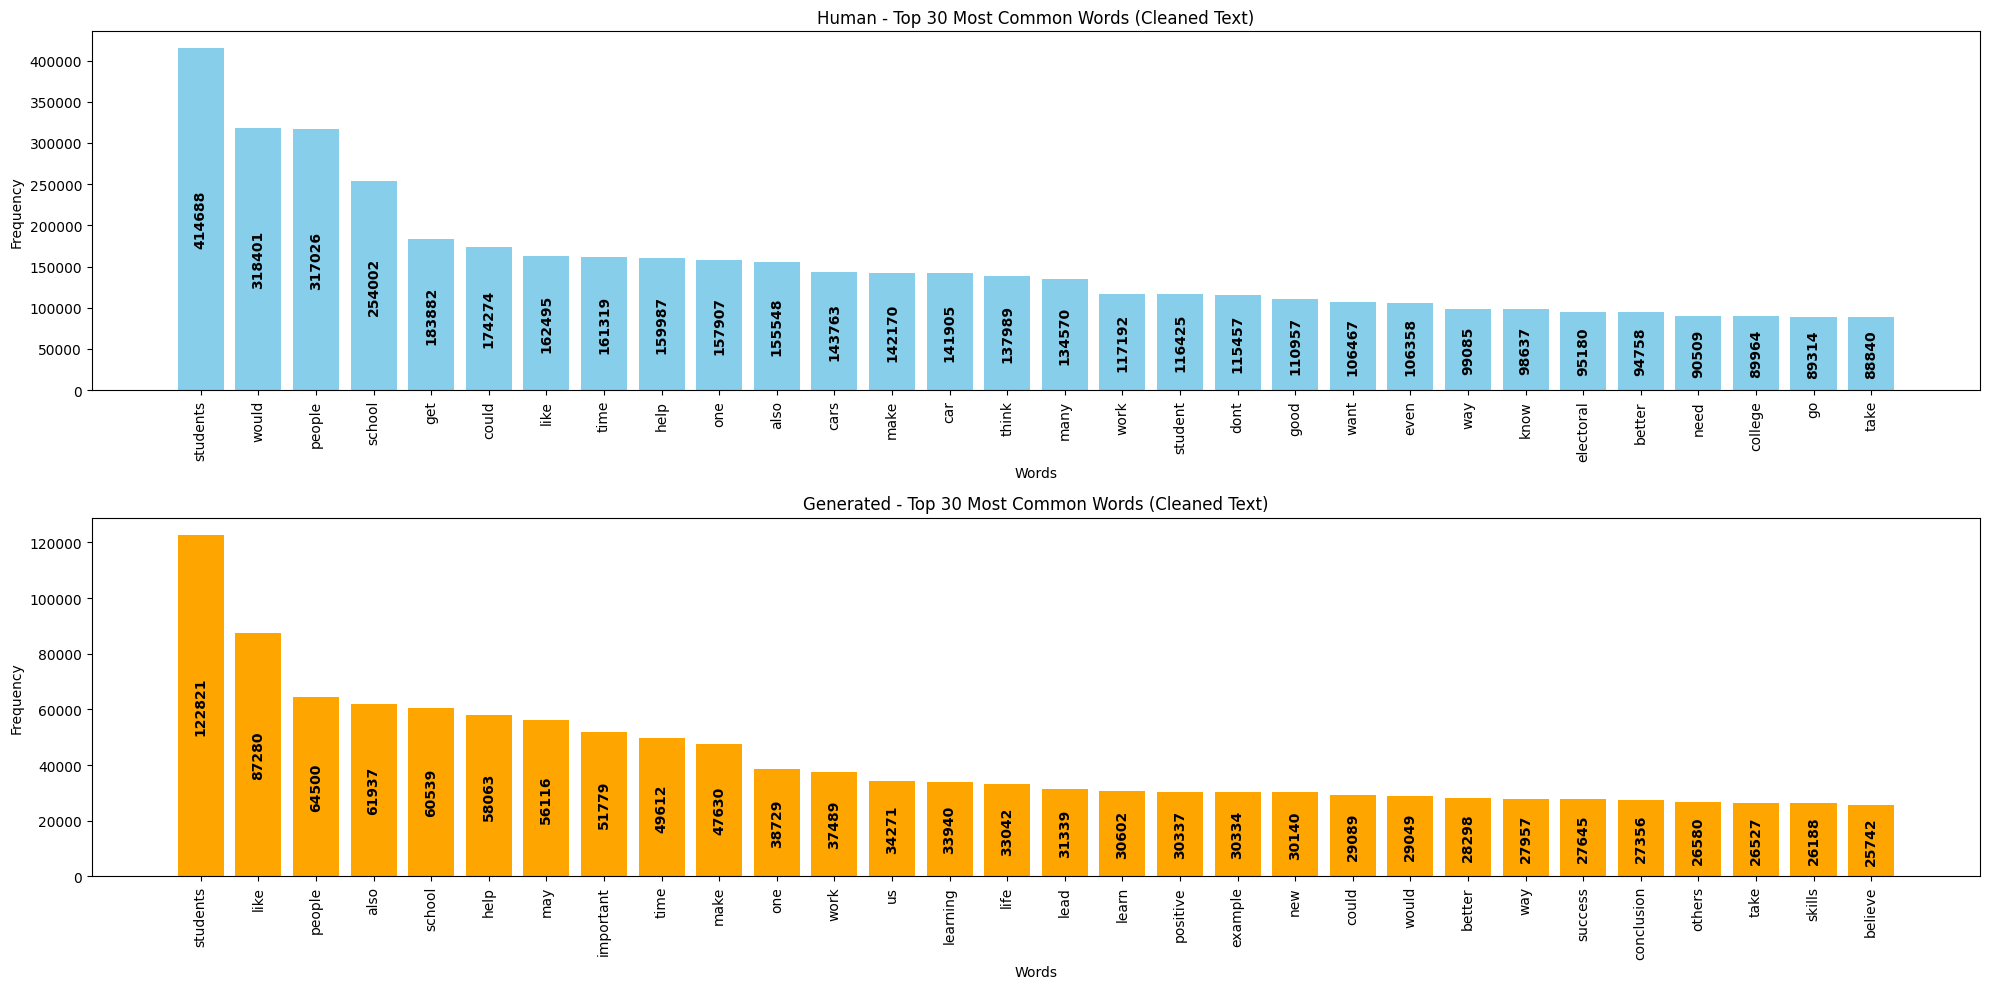

In [ ]:
# plot most common words by label

label_names = {0: 'Human', 1: 'Generated'}

def plot_most_common_words_by_label(most_common_words_by_label, title_suffix):
    num_labels = len(most_common_words_by_label)
    fig, axes = plt.subplots(num_labels, 1, figsize=(20, 5 * num_labels), squeeze=False)

    for i, (label, common_words) in enumerate(most_common_words_by_label.items()):
        # Cleaned text
        cleaned_words, cleaned_counts = zip(*common_words)
        ax = axes[i, 0]
        color = 'skyblue' if label == 0 else 'orange'
        bars = ax.bar(cleaned_words, cleaned_counts, color=color)

        # Add annotations in the center of the bars
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                        ha='center', va='center', rotation=90, fontsize=10, color='black', weight='bold')

        label_name = label_names.get(label, f'Label {label}')
        ax.set_title(f'{label_name} - Top {len(cleaned_words)} Most Common Words (Cleaned Text)')
        ax.set_xlabel('Words')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

# Plot the most common words for cleaned text by label
plot_most_common_words_by_label(most_common_cleaned_words_by_label, 'Cleaned Text')

####Word Cloud
Creating a word cloud is an effective way to visualize the most frequent words in our text data. Similar to plotting the most common words, we generate the word cloud after cleaning and tokenizing our text data to ensure that the visualization is meaningful and free from noise.

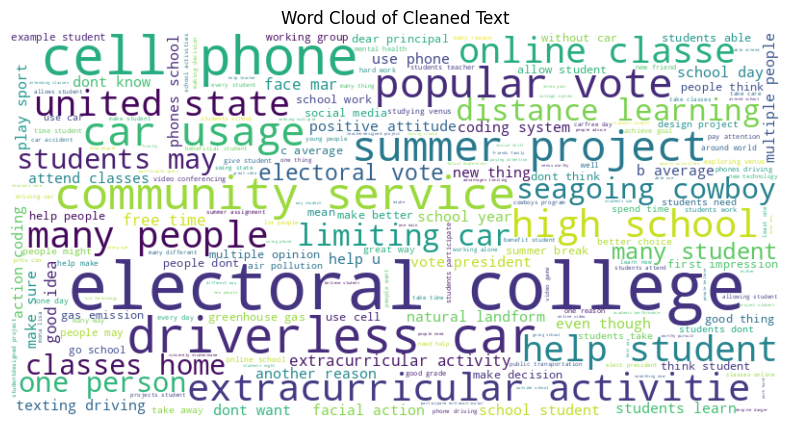

In [ ]:
from wordcloud import WordCloud

# Combine all cleaned text into a single string
all_cleaned_text = ' '.join(data['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()


**Word Cloud by Each Label -** Creating word clouds by each label allows us to visualize the most frequent words associated with each category in the dataset. This can provide insights into the distinguishing features of different classes.

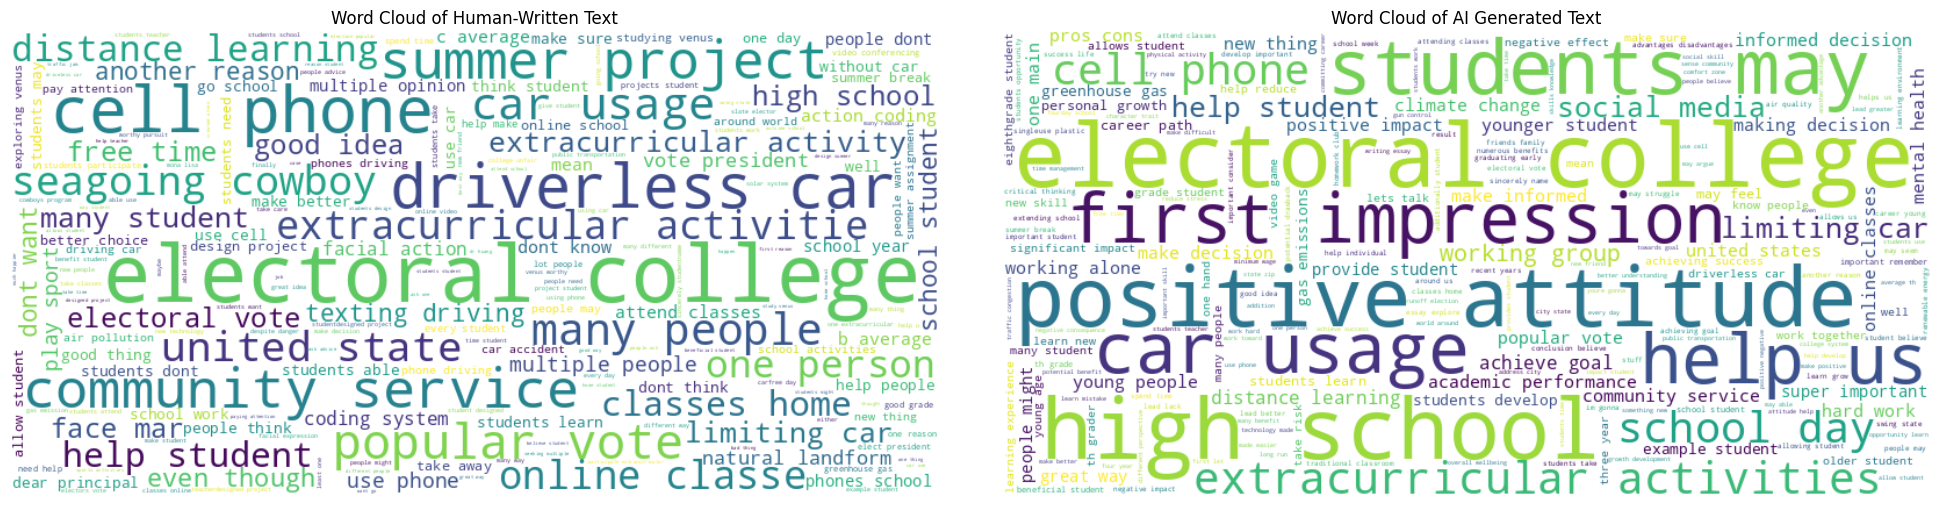

In [ ]:
labels = data['generated'].unique()
#num_labels = len(labels)
label_names = {0: 'Human-Written', 1: 'AI Generated'}

fig, axes = plt.subplots(1, 2, figsize=(20, 5), squeeze=False)

# Generate word clouds for each label
for i, label in enumerate(labels):
    label_text = ' '.join(data[data['generated'] == label]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(label_text)

    # Plot the word cloud in the corresponding subplot
    label_name = label_names.get(label, f'Label {label}')
    ax = axes[0, i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud of {label_name} Text')

plt.tight_layout()
plt.show()

#### Common Words Analysis Conclusion

The graph above illustrates a distinct pattern in word usage between human-written and AI-generated texts. While both types of text may appear similar at first glance, this analysis reveals subtle but significant differences in vocabulary preferences.

Key observations:
1. Human-specific words: Some words are predominantly used in human-written texts, potentially reflecting natural language patterns or specific human experiences.
2. AI-favored words: Certain words appear more frequently in AI-generated text, possibly due to training data biases or algorithmic tendencies.
3. Shared vocabulary: Many words are used by both humans and AI, forming a common linguistic ground.

Implications:
- Initial identification: While not definitive, the presence of certain key words can provide an initial clue about the text's origin (human or AI-generated).
- Nuanced differences: The subtle variations in word choice highlight the nuanced differences between human and AI writing styles.
- Potential for detection: This analysis suggests that automated detection systems could potentially leverage these word frequency differences.

Limitations:
- Context dependency: Word frequency alone doesn't account for context or proper usage.
- Evolving AI capabilities: As AI models improve, these differences may become less pronounced over time.

In conclusion, while it remains challenging to definitively identify the source of a text based solely on word choice, this analysis provides valuable insights into the linguistic patterns of human and AI-generated content. It underscores the importance of careful examination and the potential for more sophisticated analysis techniques in distinguishing between human and AI-authored texts.

###N-grams Analysis

#### Generate N-grams by label

 N-grams analysis aims to uncover patterns and co-occurrences of words that carry meaningful information. Therefore, it's generally best to use cleaned data for exploring N-grams.

**What We Will Gain From This Insights?**
Analyzing n-grams (bigrams, trigrams, fourgrams) by label allows us to understand the common phrases and sequences of words in the dataset. This can reveal syntactic patterns and common expressions used in both human and AI-generated texts, providing deeper insights into linguistic structures and potential distinguishing features.

**Which Technology (Frameworks and etc) We Used?**
For n-gram generation and visualization, we used:

NLTK: For tokenizing text and generating n-grams.
Collections (Counter): For counting the frequency of n-grams.
Matplotlib: For visualizing the most common n-grams.
**Issues We Had in the Way Till Managed to Implement It**
Handling large text data for n-gram generation was computationally intensive and required efficient text processing. Ensuring accurate tokenization and n-gram generation involved resolving issues with punctuation and case sensitivity. Visualizing the n-grams in a clear and interpretable manner also required careful plotting and formatting adjustments.



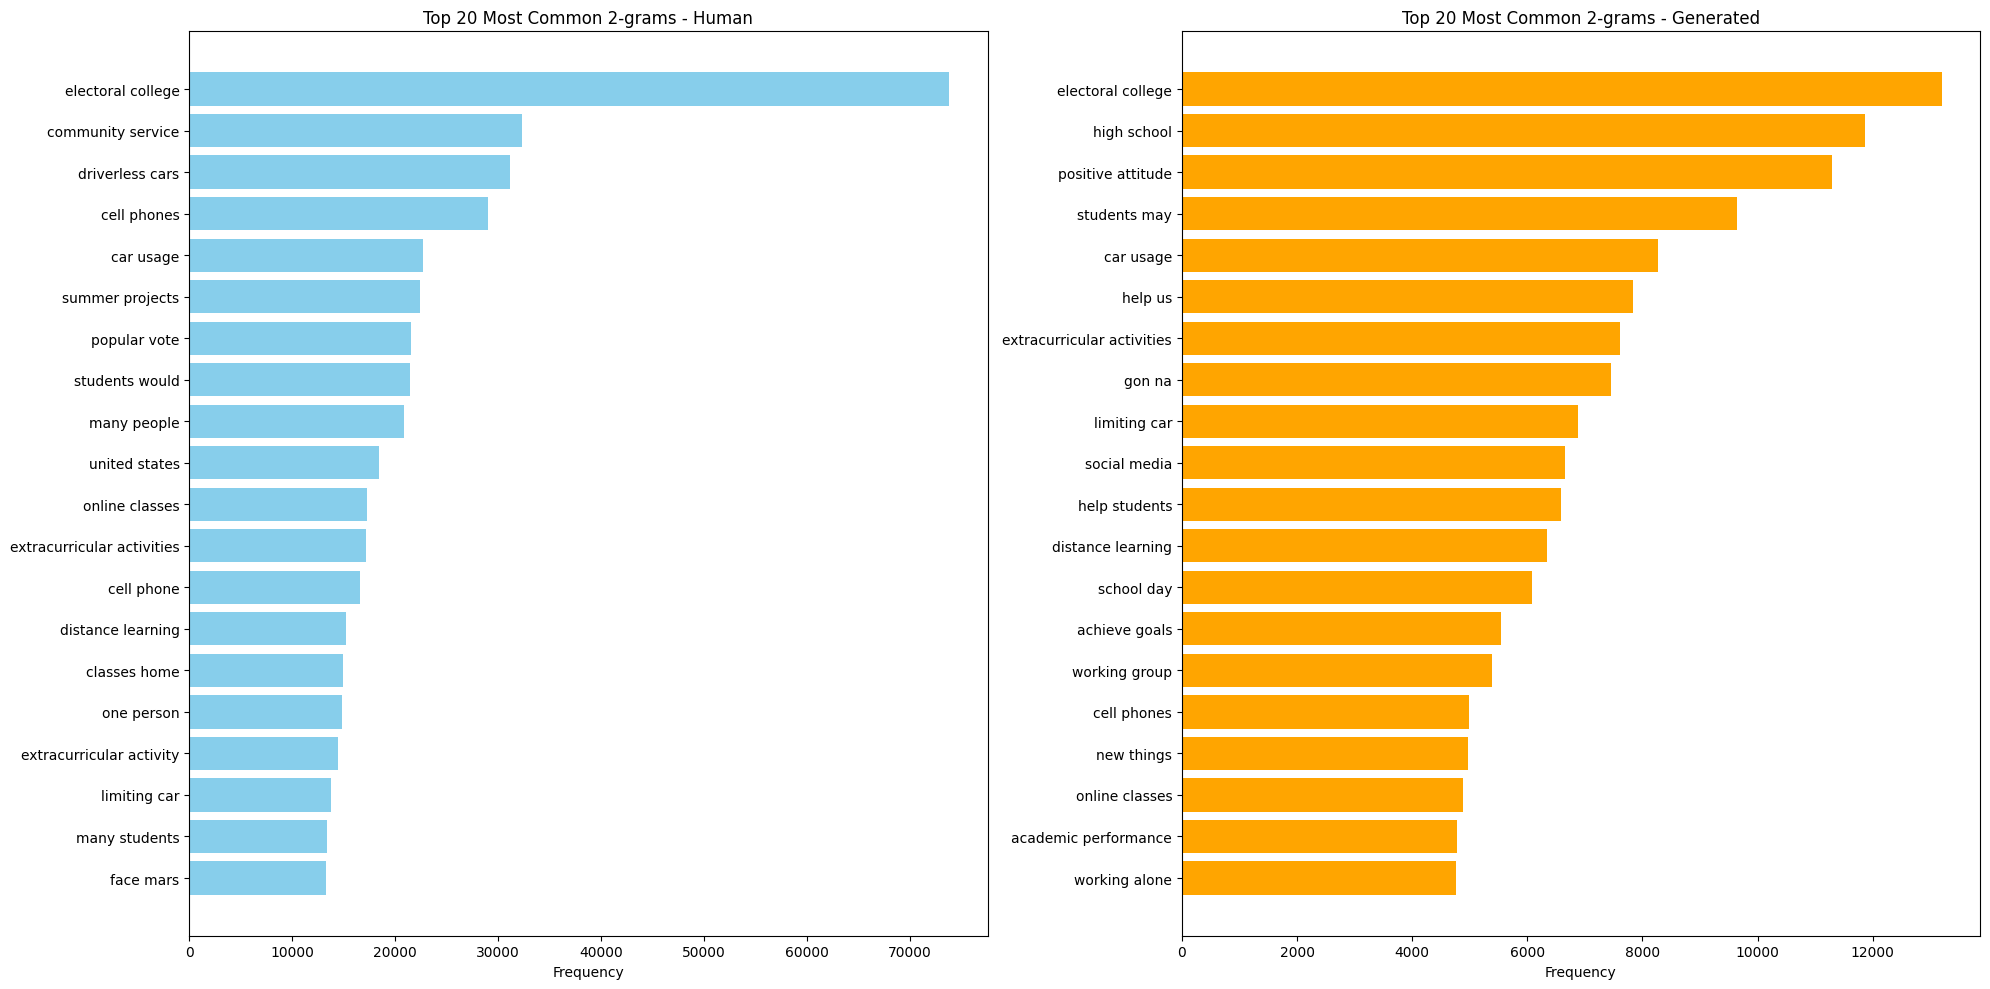

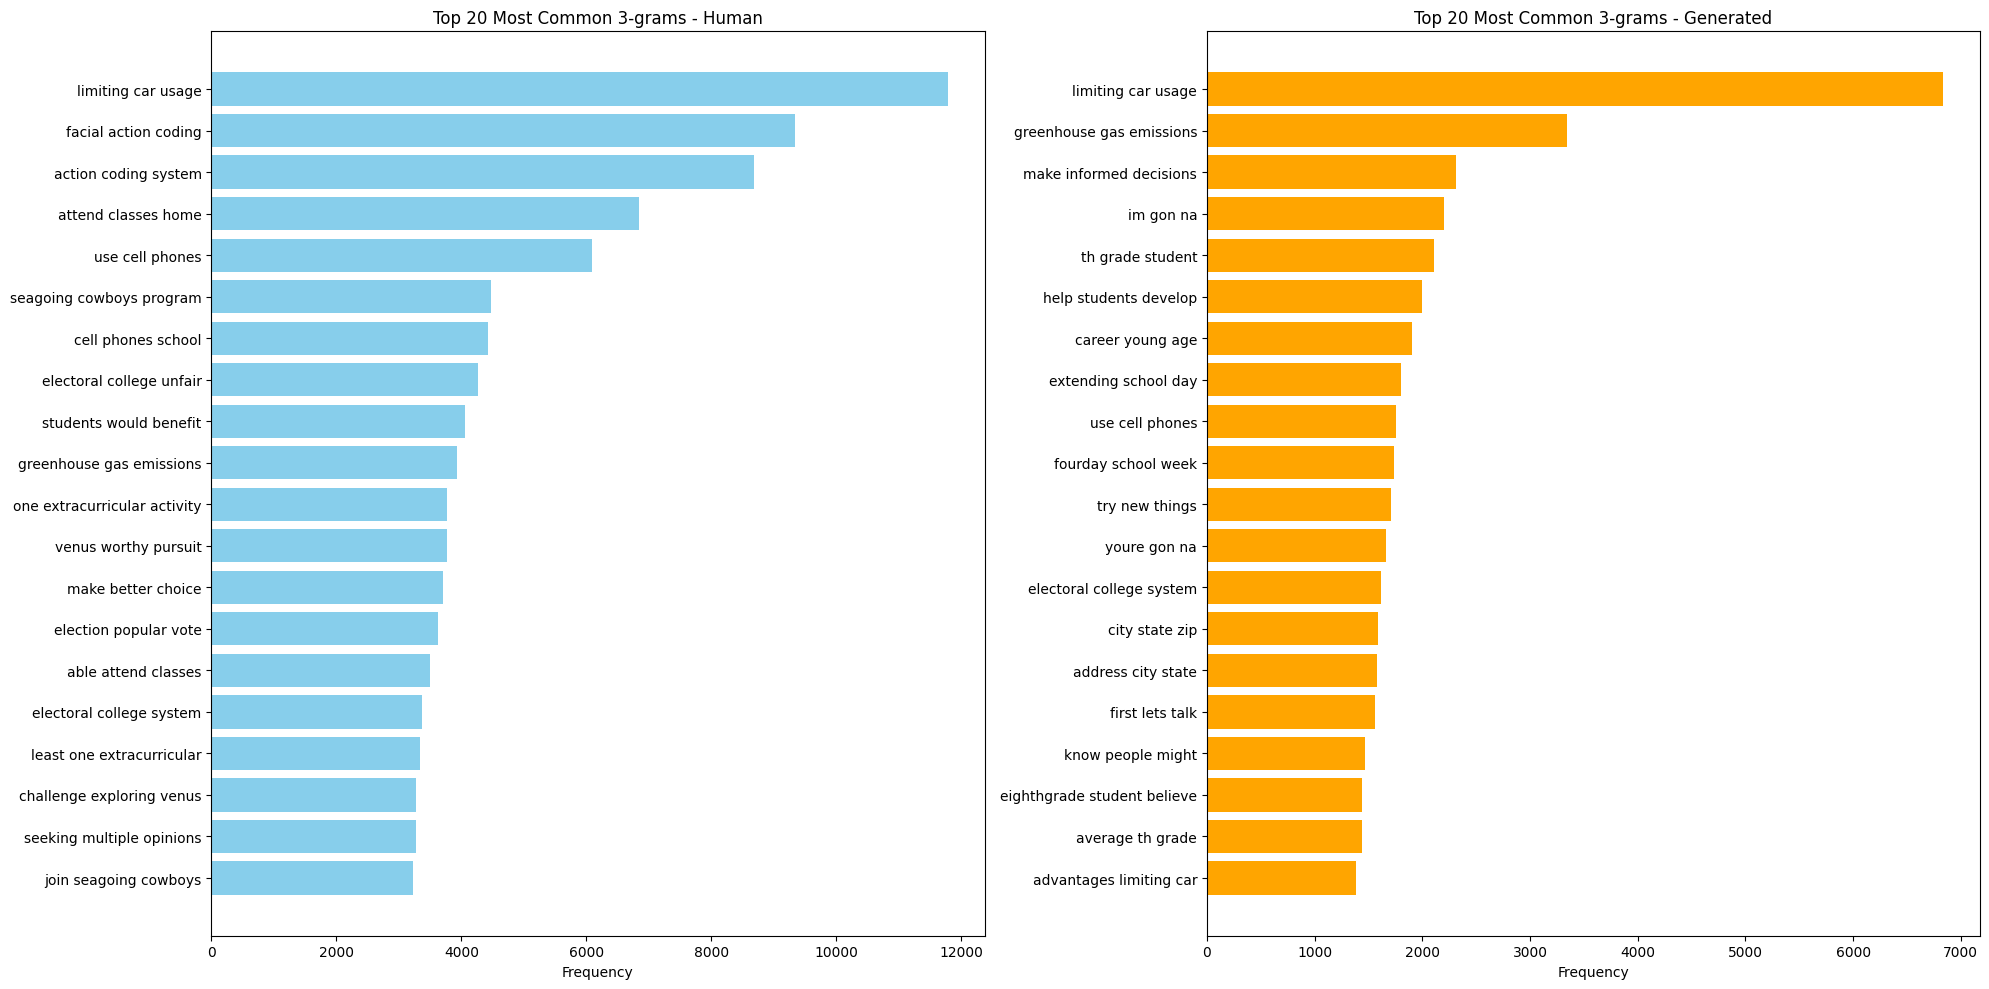

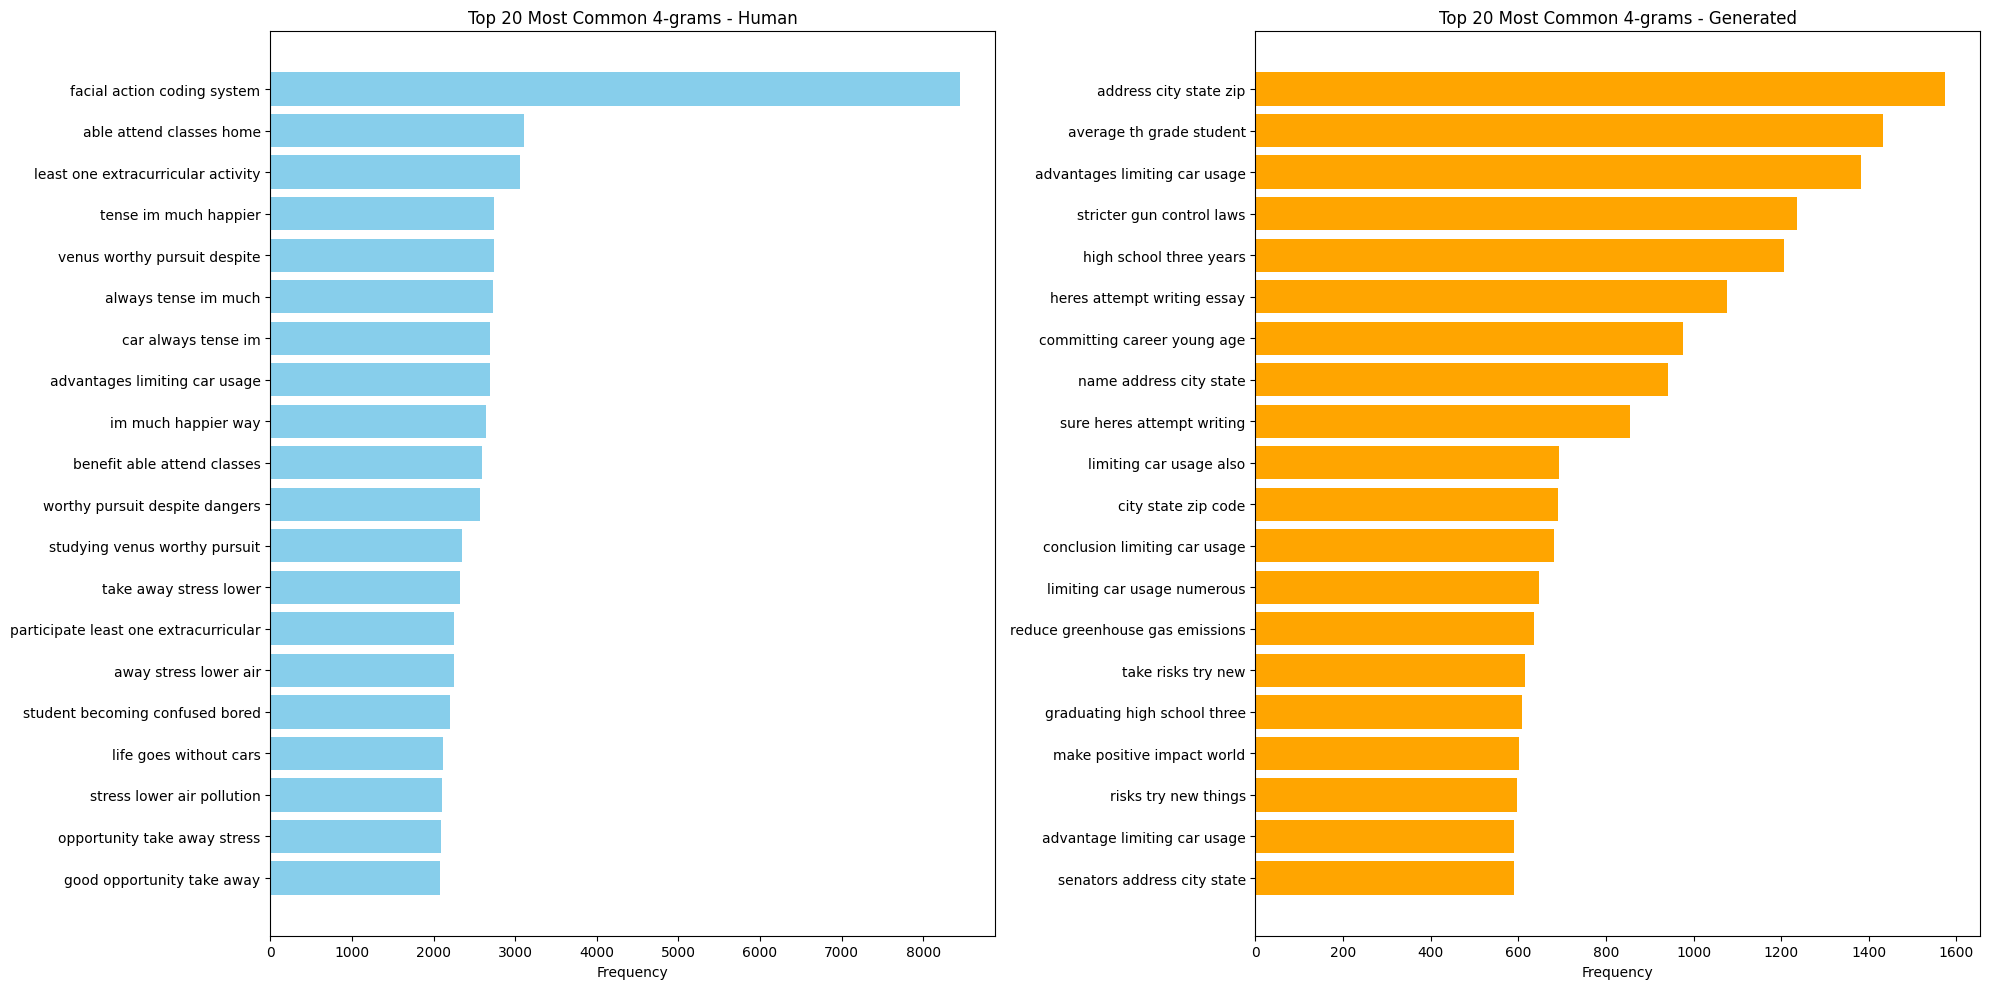

In [ ]:
def generate_ngrams(text, n):
    tokens = nltk.word_tokenize(text.lower())
    return [' '.join(gram) for gram in ngrams(tokens, n)]

def plot_ngrams(ngram_dict, title, top_n=20):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    for ax, (label, ngram_freq) in zip([ax1, ax2], ngram_dict.items()):
        ngram_common = ngram_freq.most_common(top_n)
        ngrams, freqs = zip(*ngram_common)
        ax.barh(ngrams, freqs, color='skyblue' if label == 'Human' else 'orange')
        ax.set_xlabel('Frequency')
        ax.set_title(f'{title} - {label}')
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()

def generate_and_plot_ngrams(data, n, top_n=20):
    ngram_dict = {'Human': Counter(), 'Generated': Counter()}

    for label, text in zip(data['generated'], data['cleaned_text']):
        label_key = 'Human' if label == 0 else 'Generated'
        ngram_dict[label_key].update(generate_ngrams(text, n))

    plot_ngrams(ngram_dict, f'Top {top_n} Most Common {n}-grams', top_n)

# Generate and plot bigrams, trigrams, and fourgrams
for n in [2, 3, 4]:
    generate_and_plot_ngrams(data, n)

#### N-grams Analysis Conclusion

Our analysis of n-grams (bigrams, trigrams, and fourgrams) in human-written and AI-generated texts reveals increasingly distinct patterns as we delve deeper into the linguistic structures:

1. Increasing Differentiation: As we progress from single words to more complex n-grams, the differences between human and AI-generated text become more pronounced. This suggests that while individual word choices might be similar, the way these words are combined and structured differs significantly between human and AI authors.

2. Distinct Expressions: Humans and AI tend to use different phrases and expressions. This distinction is particularly evident in the trigrams and fourgrams, where we can see complete phrases or partial sentences that are characteristic of each source.

3. Stylistic Patterns: The n-gram analysis uncovers stylistic patterns that may not be immediately apparent in a casual reading. These patterns could reflect the underlying mechanisms of human language production versus AI text generation algorithms.

4. Potential for Detection: The clear differences in n-gram usage provide a promising avenue for developing more sophisticated AI text detection methods. By analyzing these multi-word structures, we may be able to identify AI-generated text with greater accuracy than by looking at individual words alone.

5. Contextual Usage: The differences in n-grams also hint at variations in contextual understanding and usage between humans and AI. Humans might use certain phrases in ways that reflect cultural knowledge or common experiences, while AI-generated text might show patterns based on its training data and generation algorithms.

6. Evolving Landscape: It's important to note that as AI language models continue to evolve, these differences may become more subtle. Ongoing analysis will be crucial to keep pace with advancements in AI text generation.

Implications:
- For AI Detection: This analysis underscores the importance of considering multi-word units in developing AI text detection tools.
- For AI Development: Understanding these differences could guide the development of more human-like AI text generation systems.
- For Linguistic Research: The distinct patterns offer insights into the fundamental differences between human language production and AI language generation.

In conclusion, while surface-level similarities between human and AI-generated text can make distinction challenging, a deeper analysis of n-grams reveals fundamental differences in language patterns. This provides not only a method for potential identification of AI-generated text but also insights into the underlying processes of language production in both humans and AI systems.

### Sentiment Analysis

Sentiment analysis is a technique used to determine the emotional tone behind a series of words, helping to understand the attitudes, opinions, and emotions expressed in text. In our text classification task, sentiment scores are crucial features that provide additional context to the text data.



**What We Will Gain From This Insights?**
Sentiment analysis provides insights into the emotional tone and sentiment distribution within the text data. By understanding the sentiment scores and classifications, we can identify patterns of positive, negative, and neutral sentiments in both human and AI-generated texts, which can be crucial for tasks such as content moderation and sentiment-based modeling.

**Which Technology (Frameworks and etc) We Used?
For sentiment analysis, we used**

Pandas: For handling sentiment scores and classifications in the DataFrame.
Seaborn and Matplotlib: For visualizing the sentiment distributions and counts.

**Issues We Had in the Way Till Managed to Implement It**
Handling and visualizing sentiment data required efficient computation and clear plotting. Ensuring the sentiment classifications were correctly interpreted and visualized involved careful data manipulation and formatting. Additionally, creating meaningful and interpretable visualizations required adjustments to plot settings and annotations.








**Sentiment Polarity:**

  *  Positive Sentiment: Indicates that the text expresses favorable or happy emotions. For example, "I love this product!" is a positive sentiment.
  *  Negative Sentiment: Indicates that the text expresses unfavorable or unhappy emotions. For example, "This is the worst service I've ever experienced." is a negative sentiment.
  *  Neutral Sentiment: Indicates that the text does not express any strong emotion or is balanced in its expression. For example, "I'm not sure how I feel about this." is a neutral sentiment.

####Generate Sentiment Analysis by label

In [ ]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
data['sentiment'] = data['text'].apply(get_sentiment)
print("Sentiment Data:\n", data[['text', 'sentiment']])

# Count sentiments by label
sentiment_counts = data.groupby(['generated', 'sentiment']).size().unstack(fill_value=0)
print("Sentiment Counts by Label:\n", sentiment_counts)

Sentiment Data:
                                                      text sentiment
0       There are alot reasons to keep our the despise...  positive
1       Driving smart cars that drive by themself has ...  negative
2       Dear Principal,\n\nI believe that students at ...  negative
3       Dear Principal,\n\nCommunity service should no...  negative
4       My argument for the development of the driverl...  positive
...                                                   ...       ...
164867  There has been a fuss about the Elector Colleg...  positive
164868  Limiting car usage has many advantages. Such a...  positive
164869  There's a new trend that has been developing f...  positive
164870  As we all know cars are a big part of our soci...  positive
164871  Cars have been around since the 1800's and hav...  positive

[164872 rows x 2 columns]
Sentiment Counts by Label:
 sentiment  negative  neutral  positive
generated                             
0             21380      518     9

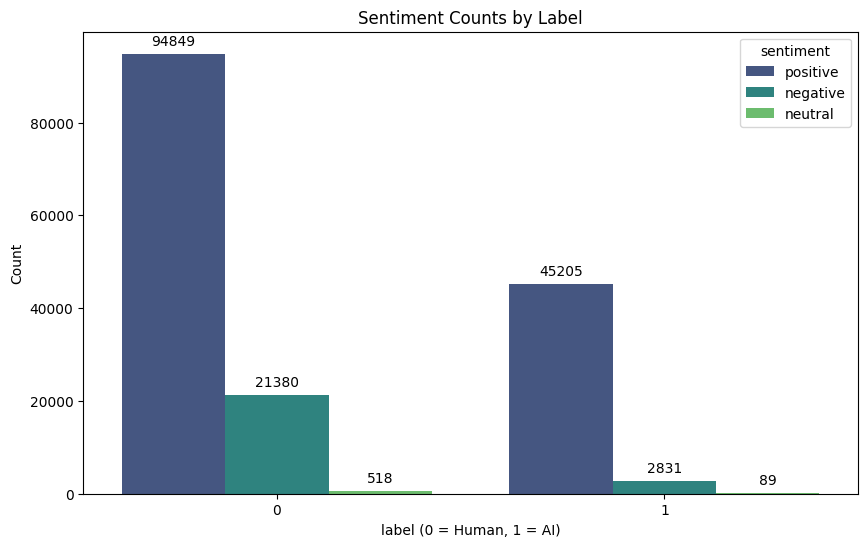

In [ ]:
vis_sentiment_counts = sentiment_counts.reset_index()

# Melt the DataFrame for seaborn
sentiment_counts_melted = vis_sentiment_counts.melt(id_vars='generated', value_vars=['positive', 'negative', 'neutral'],
                                                var_name='sentiment', value_name='count')

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=sentiment_counts_melted, x='generated', y='count', hue='sentiment', palette='viridis')

# Annotate each bar with the count value
for p in barplot.patches:
    if p.get_height() > 0:
        barplot.annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9), textcoords = 'offset points')

plt.title('Sentiment Counts by Label')
plt.xlabel('label (0 = Human, 1 = AI)')
plt.ylabel('Count')
plt.show()

####**Sentiment Scores:**
Sentiment analysis provide scores for positive, negative, neutral, and compound sentiments:
  *  Positive: Score indicating the strength of positive sentiment.
  *  Negative: Score indicating the strength of negative sentiment.
  *  Neutral: Score indicating the strength of neutral sentiment.
  *  Compound: A normalized score that combines the positive, negative, and neutral scores to give an overall sentiment score. It ranges from -1 (most negative) to +1 (most positive).

In [ ]:
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis to the original text data
data['sentiment'] = data['text'].apply(get_sentiment_scores)

# Extract sentiment features
data['positive sentiment'] = data['sentiment'].apply(lambda x: x['pos'])
data['negative sentiment'] = data['sentiment'].apply(lambda x: x['neg'])
data['neutral sentiment'] = data['sentiment'].apply(lambda x: x['neu'])
data['compound sentiment'] = data['sentiment'].apply(lambda x: x['compound'])

Save Data

In [ ]:
data.to_parquet(drive_path + 'multiple_essays&cleaned_text&tokens&sentiments.parquet', index=False)


<Figure size 1200x600 with 0 Axes>

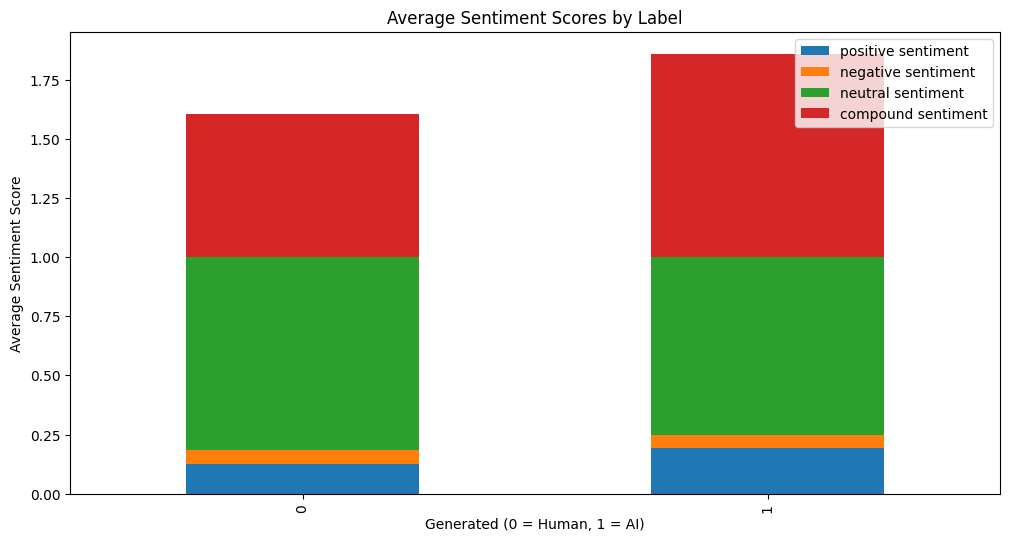

In [ ]:
# Group by labels and calculate average sentiment scores
label_sentiment = data.groupby('generated')[['positive sentiment', 'negative sentiment', 'neutral sentiment', 'compound sentiment']].mean().reset_index()

# Bar plot for average sentiment scores by label
plt.figure(figsize=(12, 6))
label_sentiment.plot(x='generated', kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sentiment Scores by Label')
plt.xlabel('Generated (0 = Human, 1 = AI)')
plt.ylabel('Average Sentiment Score')
plt.legend(loc='upper right')
plt.show()

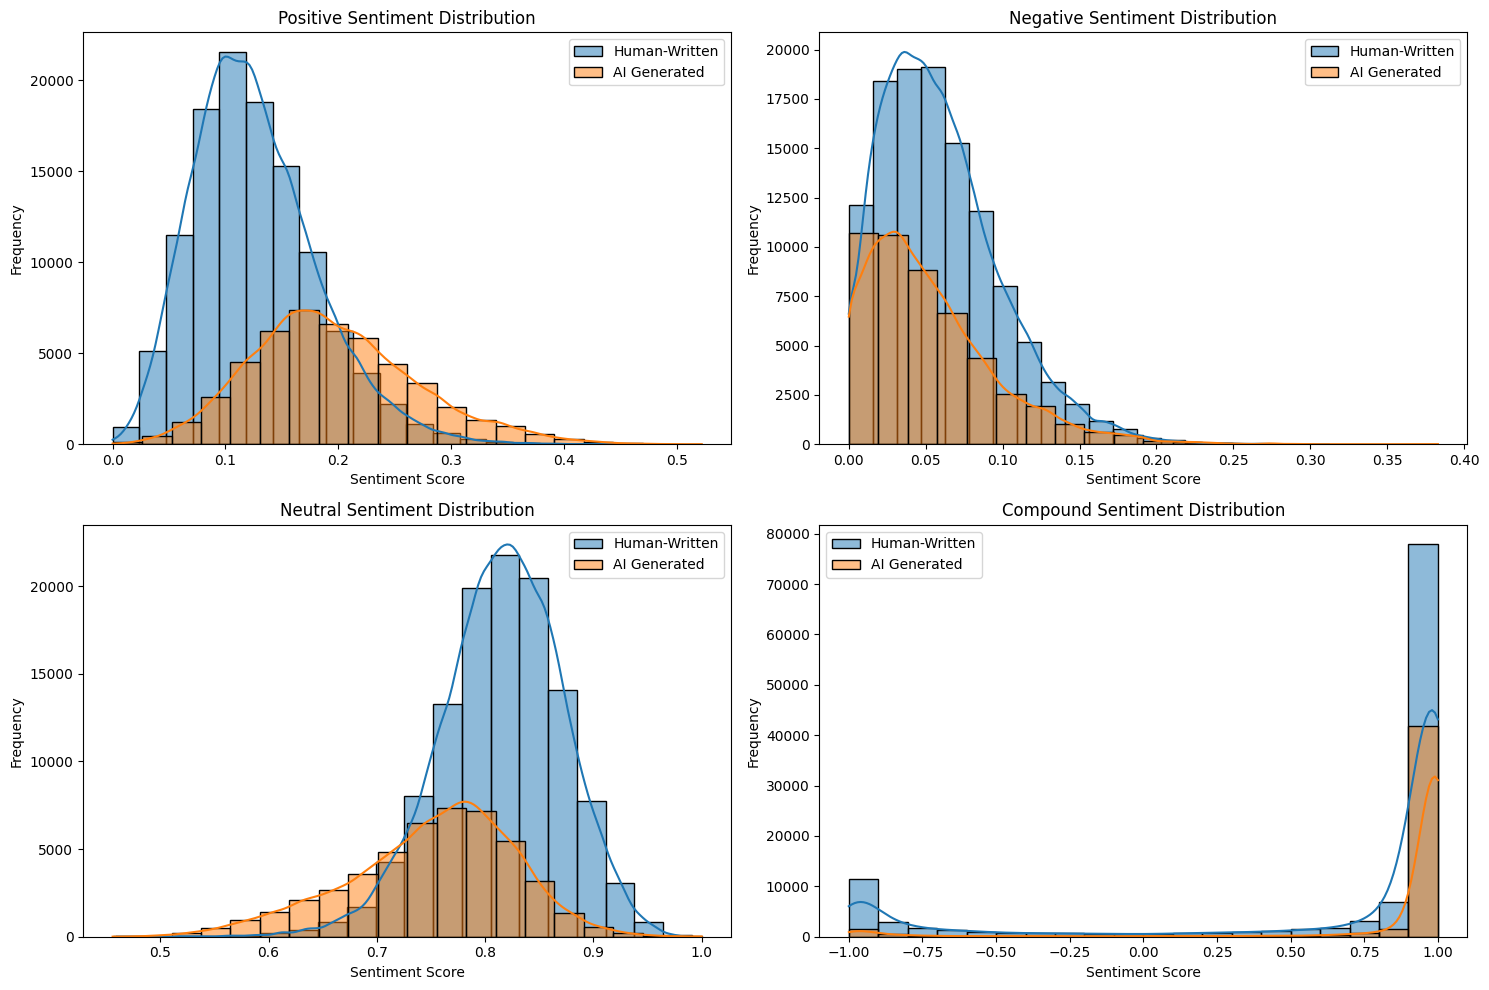

In [ ]:
# Plot distribution graphs for each sentiment score
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=False)
label_names = {0: 'Human-Written', 1: 'AI Generated'}

sentiments = ['positive sentiment', 'negative sentiment', 'neutral sentiment', 'compound sentiment']
titles = ['Positive Sentiment Distribution', 'Negative Sentiment Distribution', 'Neutral Sentiment Distribution', 'Compound Sentiment Distribution']

for i, sentiment in enumerate(sentiments):
    ax = axes[i//2, i%2]
    for label in data['generated'].unique():
        subset = data[data['generated'] == label]
        label_name = label_names.get(label, f'Label {label}')
        sns.histplot(subset[sentiment], kde=True, label=f'{label_name}', bins=20, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel('Sentiment Score')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()


## EDA conclusion
Main conclusion:
While exploratory data analysis (EDA) reveals certain differences between human and AI-generated texts, these distinctions alone are insufficient for reliable text source classification. Therefore, advanced modeling techniques are necessary to accurately identify the text origin.

Most Common Words and Word Cloud:
By analyzing the most common words and generating word clouds, we observed specific vocabulary patterns in both human and AI-generated texts. AI-generated texts tend to use more formal or technical terms, while human texts display a richer variety of idiomatic expressions. However, these differences are not definitive, indicating that word frequency and visual representations, while informative, cannot solely determine the text source.

N-grams and Sentiment Analysis:
The n-gram analysis revealed recurring phrases and linguistic structures unique to each text type, and sentiment analysis provided insights into the emotional tone of the texts. AI-generated texts showed more uniform and neutral sentiment, whereas human texts exhibited greater emotional diversity. Despite these insights, the overlap and subtle differences mean that n-grams and sentiment patterns alone are inadequate for reliable classification. Therefore, these EDA findings should be integrated into more sophisticated machine learning models to achieve accurate text source identification.








#**Prepare the Data for Model Training**

In [ ]:
data = pd.read_parquet(drive_path + 'multiple_essays&cleaned_text&tokens&sentiments.parquet')

##TF-IDF Vectorization

**TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer** is essential for transforming text data into numerical features, making it suitable for machine learning algorithms.
It also Measures how frequently a term appears in a document. The more frequent a term, the higher its TF score.

Using the TF-IDF Vectorizer on cleaned text data creates a robust and efficient representation of the text. This representation improves the performance of machine learning models for text classification tasks.

In [ ]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=3000,  # You can adjust this based on your needs
    min_df=2,           # Remove terms that appear in less than 2 documents
    max_df=0.85         # Remove terms that appear in more than 85% of documents
)
# Fit and transform the cleaned text data
tfidf_features = vectorizer.fit_transform(data['cleaned_text'])

# Convert the features to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF features
print(tfidf_df.head())

   abilities  ability      able  abolish  abolished  absolutely  abuse  \
0        0.0      0.0  0.026795      0.0        0.0    0.000000    0.0   
1        0.0      0.0  0.000000      0.0        0.0    0.000000    0.0   
2        0.0      0.0  0.000000      0.0        0.0    0.000000    0.0   
3        0.0      0.0  0.029761      0.0        0.0    0.077367    0.0   
4        0.0      0.0  0.028382      0.0        0.0    0.000000    0.0   

   academic  academically  academics  ...  youll  young  younger     youre  \
0       0.0           0.0        0.0  ...    0.0    0.0      0.0  0.000000   
1       0.0           0.0        0.0  ...    0.0    0.0      0.0  0.000000   
2       0.0           0.0        0.0  ...    0.0    0.0      0.0  0.000000   
3       0.0           0.0        0.0  ...    0.0    0.0      0.0  0.047755   
4       0.0           0.0        0.0  ...    0.0    0.0      0.0  0.000000   

   youth  youve  zip  zone  zones  zoos  
0    0.0    0.0  0.0   0.0    0.0   0.0  
1 

In [ ]:
tfidf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164872 entries, 0 to 164871
Columns: 3000 entries, abilities to zoos
dtypes: float64(3000)
memory usage: 3.7 GB


## PCA Transformation:

**Reducing the Number of Features with PCA:**  
The TF-IDF vectorizer create a 3000 features, which can be computationally expensive and may lead to overfitting. To address this, we use Principal Component Analysis (PCA) to reduce the number of features to 100.

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=100)  # Reduce to 100 dimensions
reduced_tfidf_matrix = pca.fit_transform(tfidf_df)

# Generate column names for the 100 principal components
column_names = [f'Principal Component {i+1}' for i in range(100)]

# Convert the reduced matrix to DataFrame
reduced_tfidf_df = pd.DataFrame(reduced_tfidf_matrix, columns=column_names)

# Display the reduced TF-IDF DataFrame
print(reduced_tfidf_df)

        Principal Component 1  Principal Component 2  Principal Component 3  \
0                    0.480854               0.481324              -0.123376   
1                    0.191796              -0.369763              -0.229662   
2                   -0.184416               0.015185              -0.126379   
3                   -0.083348               0.044767              -0.013280   
4                    0.224137              -0.415361              -0.246997   
...                       ...                    ...                    ...   
164867               0.322541               0.305280              -0.070180   
164868               0.138479              -0.297583              -0.198840   
164869               0.196350              -0.314141              -0.187126   
164870               0.248369              -0.438832              -0.268732   
164871               0.213497              -0.364067              -0.230780   

        Principal Component 4  Principal Component 

In [ ]:
reduced_tfidf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164872 entries, 0 to 164871
Data columns (total 100 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Principal Component 1    164872 non-null  float64
 1   Principal Component 2    164872 non-null  float64
 2   Principal Component 3    164872 non-null  float64
 3   Principal Component 4    164872 non-null  float64
 4   Principal Component 5    164872 non-null  float64
 5   Principal Component 6    164872 non-null  float64
 6   Principal Component 7    164872 non-null  float64
 7   Principal Component 8    164872 non-null  float64
 8   Principal Component 9    164872 non-null  float64
 9   Principal Component 10   164872 non-null  float64
 10  Principal Component 11   164872 non-null  float64
 11  Principal Component 12   164872 non-null  float64
 12  Principal Component 13   164872 non-null  float64
 13  Principal Component 14   164872 non-null  float64
 14  Pri

##Combine Reduced TF-IDF features with sentiment scores


After reducing the number of features using PCA, we combine the reduced TF-IDF features with the sentiments features.
The reason is that the TF-IDF captures the importance of words in the text, but sentiment scores provide a different perspective by quantifying the emotional tone of the text. Combining both types of features enriches the overall feature set.

In [ ]:
# Combine TF-IDF features with sentiment scores
combined_features = pd.concat([reduced_tfidf_df, data[['positive sentiment', 'negative sentiment', 'neutral sentiment', 'compound sentiment']]], axis=1)

# Extract the labels
labels = data['generated']

In [ ]:
print(combined_features.shape)
print(combined_features.info())
print('\n')
print(labels.shape)
print(labels.info())

(164872, 104)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164872 entries, 0 to 164871
Columns: 104 entries, Principal Component 1 to compound sentiment
dtypes: float64(104)
memory usage: 130.8 MB
None


(164872,)
<class 'pandas.core.series.Series'>
RangeIndex: 164872 entries, 0 to 164871
Series name: generated
Non-Null Count   Dtype
--------------   -----
164872 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB
None


##Split the data:

70% of the data is used for training the models, 15% is set aside for validation purposes, and the remaining 15% is reserved as the test set. The test set will only be used for evaluating the performance of the best selected model.

In [ ]:
# Split the data: 70% training, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(combined_features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
(X_train.shape, X_temp.shape, y_train.shape, y_temp.shape)

((115410, 104), (49462, 104), (115410,), (49462,))

In [ ]:
(X_val.shape, X_test.shape, y_val.shape, y_test.shape)

((24731, 104), (24731, 104), (24731,), (24731,))

##Balancing the Training Data Set


SMOTE is used to balance the class distribution by generating synthetic data objects for the minority class, which helps in training more robust and unbiased models.     The SMOTE creates new instances by interpolating between existing instances of the minority class.

We only apply SMOTE on the training set, and not on the validation/test set, and that because the validation/test set is meant to simulate real-world data. Applying SMOTE on the validation/test set would alter its natural distribution, and leading to an unrealistic evaluation of model performance.

In [ ]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_smote.shape, y_train_smote.shape

((163602, 104), (163602,))

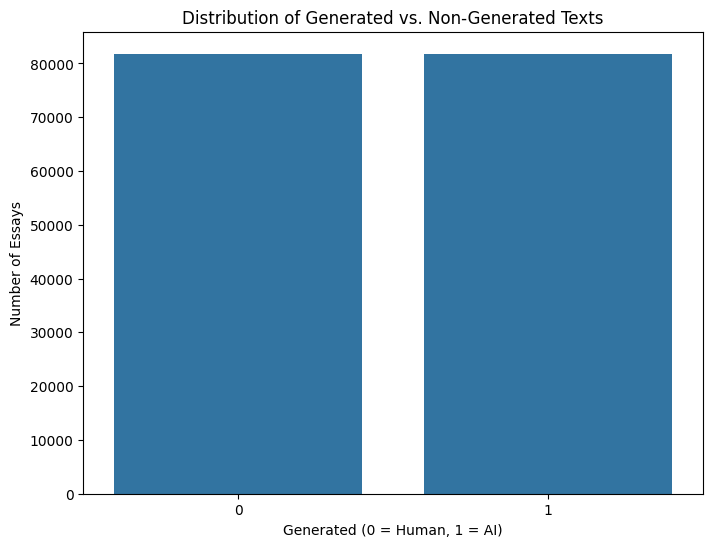

In [ ]:
y_df = pd.DataFrame(y_train_smote)

# Visualize the number of generated and non-generated texts
plt.figure(figsize=(8, 6))
sns.countplot(x='generated', data=y_df)
plt.title('Distribution of Generated vs. Non-Generated Texts')
plt.xlabel('Generated (0 = Human, 1 = AI)')
plt.ylabel('Number of Essays')
plt.show()

# **Models Training**

In selecting models for our text classification task, we focused on a diverse set of algorithms that bring various strengths and capabilities to the problem. Here are the models we chose and the reasons for selecting each:
1.   **Logistic Regression -** Logistic Regression is a staple in classification
tasks, particularly useful in text classification for several reasons:
  *   Simplicity and Interpretability: Logistic Regression is straightforward to implement and provides coefficients that can be easily interpreted, offering insights into feature importance.
  *   Baseline Performance: It serves as a strong baseline model, often performing well on text data due to its simplicity.
  *   Handling Sparsity: It performs effectively with sparse datasets, which is common in text classification when using techniques like TF-IDF.

2.   **Random Forest -** Random Forest is an ensemble method that leverages the power of multiple decision trees, providing:
  *  Robustness and Generalization: The ensemble nature reduces the risk of overfitting and improves generalization on unseen data.
  *  Feature Importance: It provides a clear indication of which features are most important, aiding in understanding the data.
  *  Non-Linearity Handling: Random Forest can capture non-linear relationships between features, which can be beneficial in complex text classification tasks.

3.  **Support Vector Machine (SVM) -** Support Vector Machine is highly effective in high-dimensional spaces, which is common in text data:
  *  High Dimensionality: SVMs handle high-dimensional data well, typical in text classification after vectorization.
  *  Kernel Trick: The ability to apply kernel functions allows SVMs to classify data that is not linearly separable, adding flexibility in handling complex relationships.
  *  Margin Maximization: SVMs focus on maximizing the margin between classes, leading to better generalization on new data.

4.  **Gradient Boosting -** Gradient Boosting builds models sequentially to correct errors from previous models, offering:
  *  High Predictive Power: It often achieves top performance on classification tasks by reducing bias and variance.
  *  Handling Complex Patterns: It captures intricate patterns in the data, making it suitable for complex text classification tasks.
  *  Flexibility: It can be tuned to optimize various performance metrics, providing a robust tool for text classification.

5.  **Neural Network -** Neural Networks bring a different approach to text classification with their ability to learn complex patterns directly from the data:
  *  Non-Linear Relationships: Neural Networks can capture complex, non-linear relationships in the data, which can be particularly useful in text classification.
  *  Feature Learning: They can automatically learn features from raw text data.
  *  Scalability: Neural Networks can handle large-scale data efficiently.



Using this diverse set of models allows us to leverage their individual strengths to effectively deal with the text classification task. This approach enables us to compare performance across different methods and select the most suitable model for our specific needs.

## Train Logistic Regression, Random Forest, SVM and Gradient Boosting        


### Initialize the **Logistic Regression, Random Forest, SVM and Gradient Boosting** Models:

In [ ]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}


### Train Logistic Regression, Random Forest, SVM and Gradient Boosting on the **Training Set**:


In [ ]:
for model_name, model in models.items():
    print(f'Training {model_name}...')

    # Train the model
    model.fit(X_train_smote, y_train_smote)

Training Logistic Regression...
Training Random Forest...
Training Support Vector Machine...
Training Gradient Boosting...


###Evaluate Logistic Regression, Random Forest, SVM and Gradient Boosting on the **Validation Set**:

In [ ]:
conf_matrices = []
class_reports = {}
model_names = []
results = {}

for model_name, model in models.items():

    # Evaluate on the validation set
    y_val_pred = model.predict(X_val)


    cls_rpt = classification_report(y_val, y_val_pred)
    class_reports[model_name] = cls_rpt

    # Store the confusion matrix
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    conf_matrices.append(conf_matrix)
    model_names.append(model_name)

    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)

    results[model_name] = {
        "accuracy": val_accuracy,
        "precision": val_precision,
        "recall": val_recall,
        "f1": val_f1
    }

##Train Neural Network

### Encode target labels (0 and 1):

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_smote) # encode the smote train set
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

###Create Neural Network Model:

In [ ]:
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          13,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,761 (85.00 KB)

 Trainable params: 21,761 (85.00 KB)

 Non-trainable params: 0 (0.00 B)

###Train The Neural Network on the Training Set and the Validation Set:

In [ ]:
nn_model.fit(X_train_smote, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded), verbose=1)

Epoch 1/10
5113/5113 [==============================] - 19s 3ms/step - loss: 0.0706 - accuracy: 0.9757 - val_loss: 0.0373 - val_accuracy: 0.9878
Epoch 2/10
5113/5113 [==============================] - 17s 3ms/step - loss: 0.0352 - accuracy: 0.9885 - val_loss: 0.0314 - val_accuracy: 0.9902
Epoch 3/10
5113/5113 [==============================] - 15s 3ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0253 - val_accuracy: 0.9921
Epoch 4/10
5113/5113 [==============================] - 15s 3ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0227 - val_accuracy: 0.9928
Epoch 5/10
5113/5113 [==============================] - 15s 3ms/step - loss: 0.0213 - accuracy: 0.9928 - val_loss: 0.0219 - val_accuracy: 0.9937
Epoch 6/10
5113/5113 [==============================] - 15s 3ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.0194 - val_accuracy: 0.9944
Epoch 7/10
5113/5113 [==============================] - 15s 3ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.0195 - val_ac

###Evaluate Neural Network

Make predictions on the **Validation Set**:

In [ ]:
nn_y_val_pred_prob = nn_model.predict(X_val)
nn_y_val_pred = (nn_y_val_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

773/773 [==============================] - 2s 2ms/step


In [ ]:
# Evaluate the Neural Network
accuracy_nn = accuracy_score(y_val_encoded, nn_y_val_pred)
precision_nn = precision_score(y_val_encoded, nn_y_val_pred)
recall_nn = recall_score(y_val_encoded, nn_y_val_pred)
f1_nn = f1_score(y_val_encoded, y_val_pred)
roc_auc_nn = roc_auc_score(y_val_encoded, nn_y_val_pred)

results["Neural Network"] = {
    "accuracy": accuracy_nn,
    "precision": precision_nn,
    "recall": recall_nn,
    "f1": f1_nn

}

##Models Performance on the Validation Set:

###Logistic Regression, Random Forest, SVM and Gradient Boosting Performance (Validation Set):

Confusion Matrices and Classification Reports

Accuracy of Logistic Regression: 0.9755
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     17530
           1       0.95      0.97      0.96      7201

    accuracy                           0.98     24731
   macro avg       0.97      0.97      0.97     24731
weighted avg       0.98      0.98      0.98     24731



Accuracy of Random Forest: 0.9968
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17530
           1       1.00      0.99      0.99      7201

    accuracy                           1.00     24731
   macro avg       1.00      1.00      1.00     24731
weighted avg       1.00      1.00      1.00     24731



Accuracy of Support Vector Machine: 0.9765
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     17530
           1       0.95      0.97      0.96      7201

    accuracy                           0.98     24731
   macr

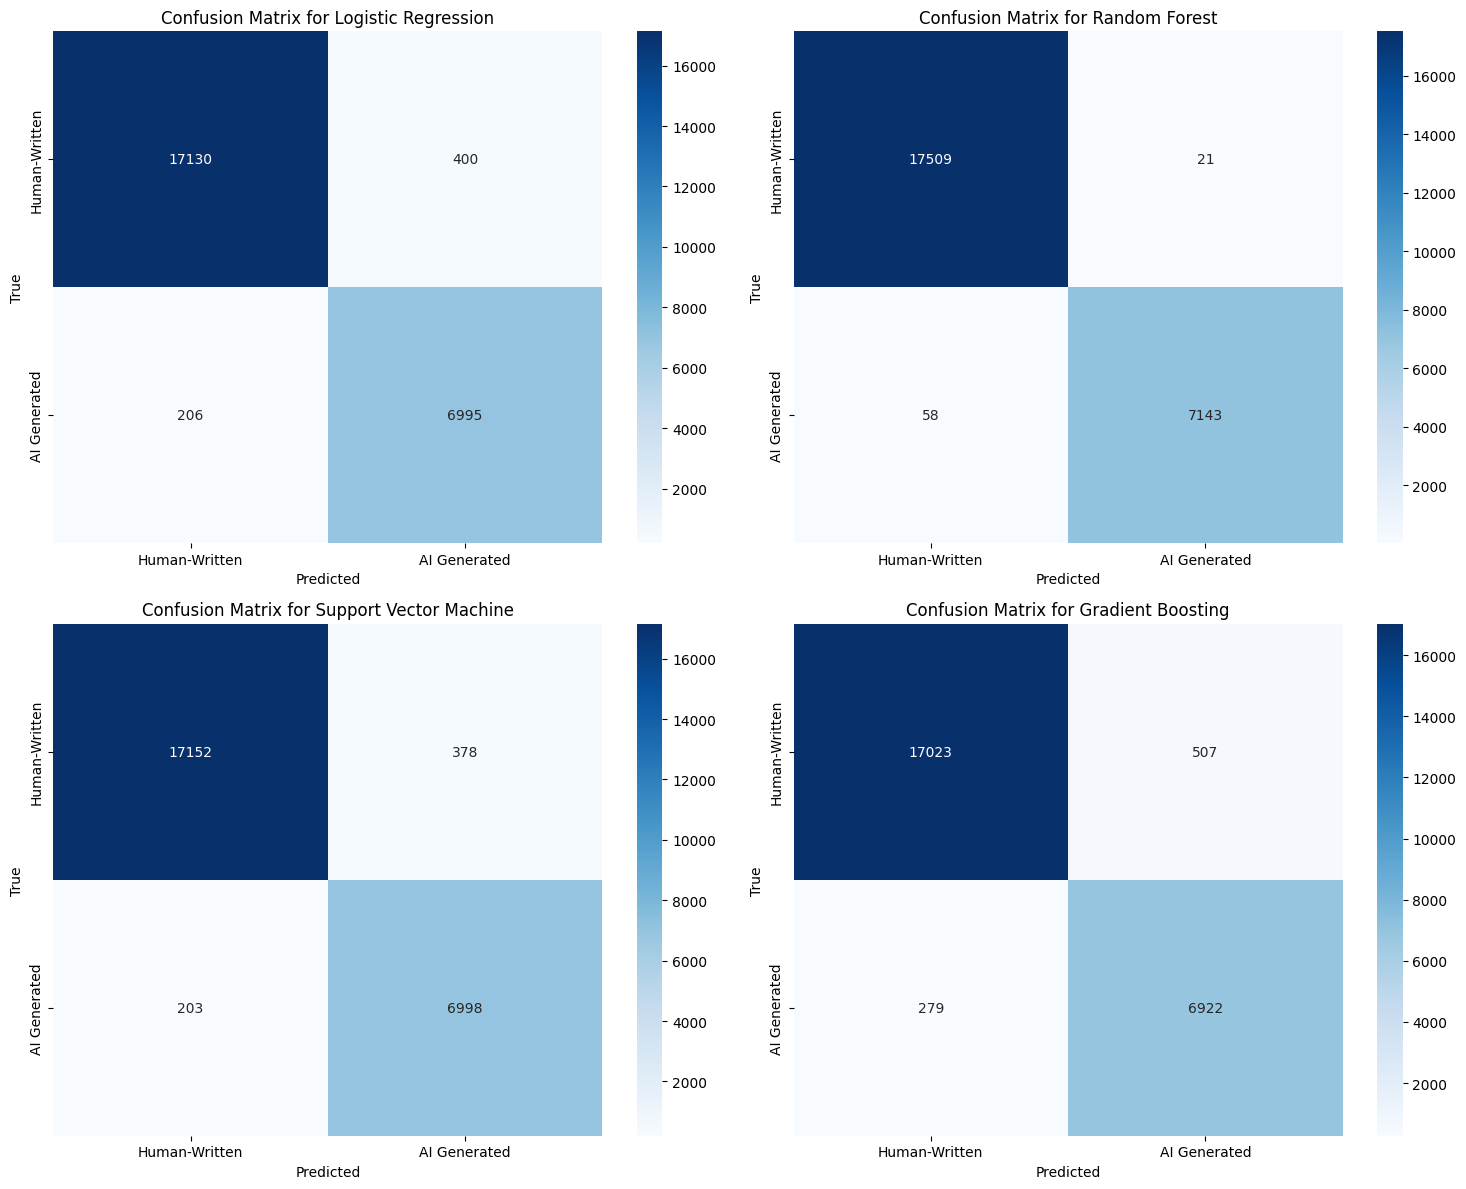

In [ ]:
labels = ['Human-Written', 'AI Generated']

# Visualize the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, (model_name, conf_matrix) in enumerate(zip(model_names, conf_matrices)):

    # Print classification report
    print(f'Accuracy of {model_name}: {results[model_name]["accuracy"]:.4f}')
    print(class_reports[model_name])
    print('\n' + '='*60 + '\n')

    ax = axes[i//2, i%2]
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=labels, yticklabels=labels)
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

###Neural Network Performance (Validation Set):

Confusion Matrix and Classification Report

Accuracy of Neural Network: 0.9948
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17530
           1       0.99      0.99      0.99      7201

    accuracy                           0.99     24731
   macro avg       0.99      0.99      0.99     24731
weighted avg       0.99      0.99      0.99     24731



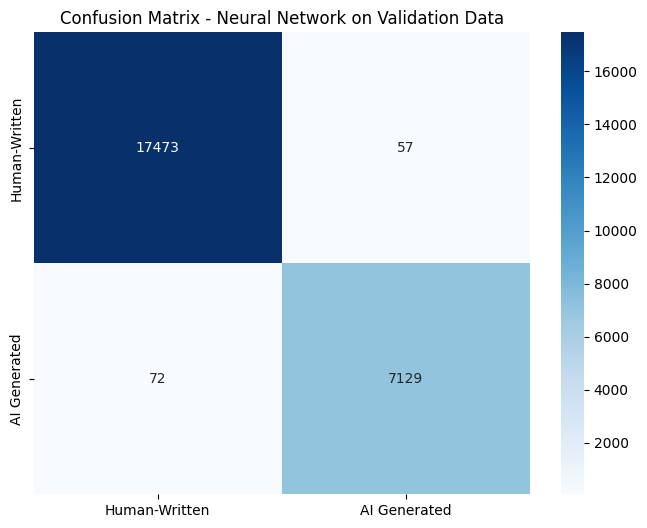

In [ ]:
# Print classification report
print(f'Accuracy of Neural Network: {accuracy_nn:.4f}')
cr = classification_report(y_val_encoded, nn_y_val_pred)
print('Classification Report:\n', cr)

nn_val_conf_matrix = confusion_matrix(y_val_encoded, nn_y_val_pred)
labels = ['Human-Written', 'AI Generated']

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(nn_val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Neural Network on Validation Data')
plt.show()


###Performance Matrics (Validation Set):

Model Performance (Validation Set):
                        accuracy  precision    recall        f1
Logistic Regression     0.975496   0.945909  0.971393  0.958482
Random Forest           0.996806   0.997069  0.991946  0.994501
Support Vector Machine  0.976507   0.948753  0.971809  0.960143
Gradient Boosting       0.968218   0.931754  0.961255  0.946275
Neural Network          0.994784   0.992068  0.990001  0.946275


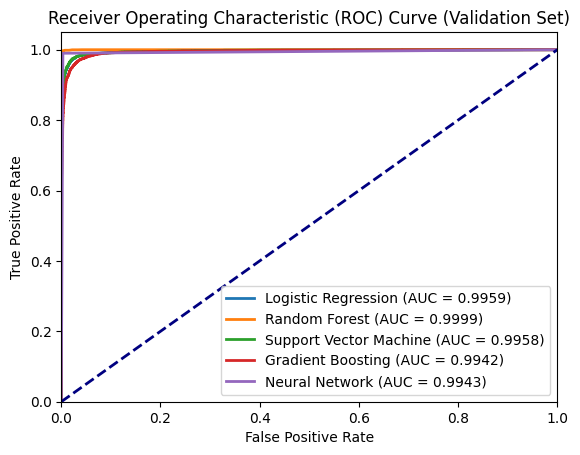

<Figure size 640x480 with 0 Axes>

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print('Model Performance (Validation Set):')
print(results_df)

# ROC curves
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_val)[:, 1]
    else:  # for SVM with probability=True
        y_pred_prob = model.decision_function(X_val)
    fpr, tpr, _ = roc_curve(y_val_encoded, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')


# Add ROC curve for Neural Network
fpr_nn, tpr_nn, _nn = roc_curve(y_val_encoded, nn_y_val_pred)

plt.plot(fpr_nn, tpr_nn, lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Validation Set)')
plt.legend(loc="lower right")
plt.show()
plt.tight_layout()
plt.show()


###Analysis the Results and Choosing the Best Model

**Confusion Matrices:**

The Random Forest and Neural Network models show the best performance with the highest true positives and true negatives and the lowest false positives and false negatives.      
Support Vector Machine and Logistic Regression also perform well, while Gradient Boosting has slightly higher false positives and false negatives compared to the other models.

**Performance Metrics:**

Random Forest and Neural Network models show the highest performance across all metrics.  
The Logistic Regression model is also highly efficient, performing well and running very fast along with the Neural Network.
The Support Vector Machine and Gradient Boosting models perform well but have longer running times and slightly lower metrics compared to the top performers.

**ROC Curves:**

The ROC curves for all models show excellent performance with areas under the curve (AUC) very close to 1. The Random Forest model has the highest AUC (0.9999), indicating almost perfect classification ability, followed closely by the Neural Network (0.9943).



**Choosing the Best Models:**

Based on the analysis of the confusion matrices, performance metrics, and running times, we would choose to use the Neural Network and Random Forest models for our test evaluation.

In [ ]:
best_models = {
    'Neural Network': nn_model,
    'Random Forest': models['Random Forest']
}

###Feature Importance:

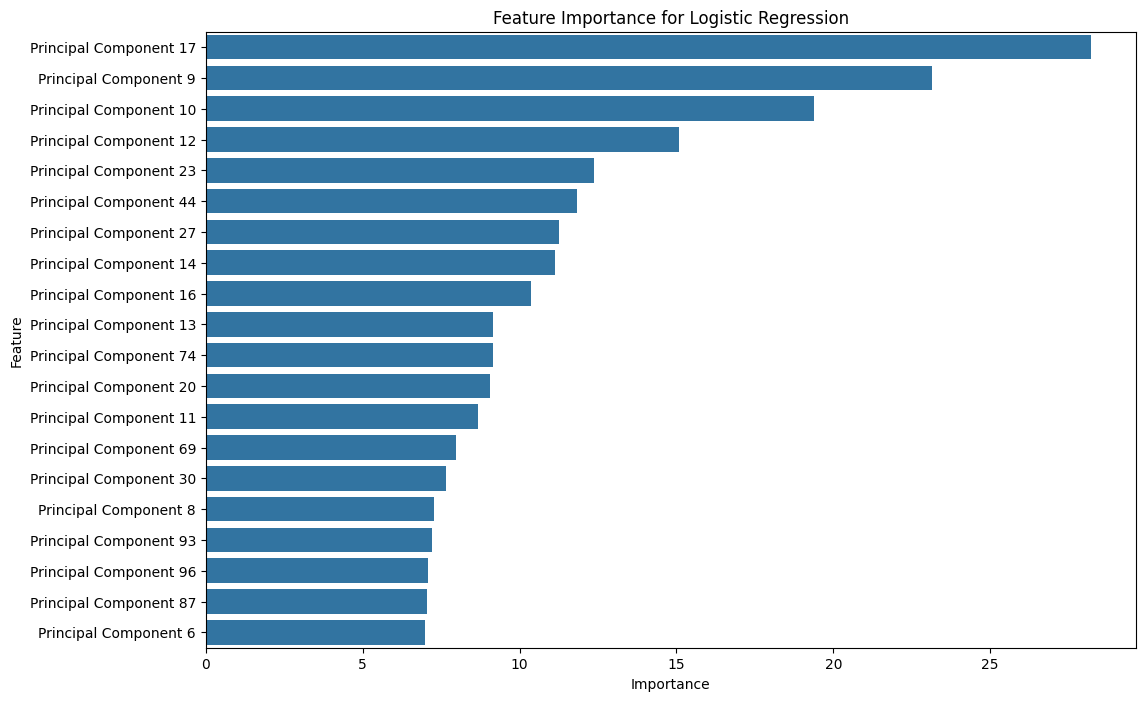

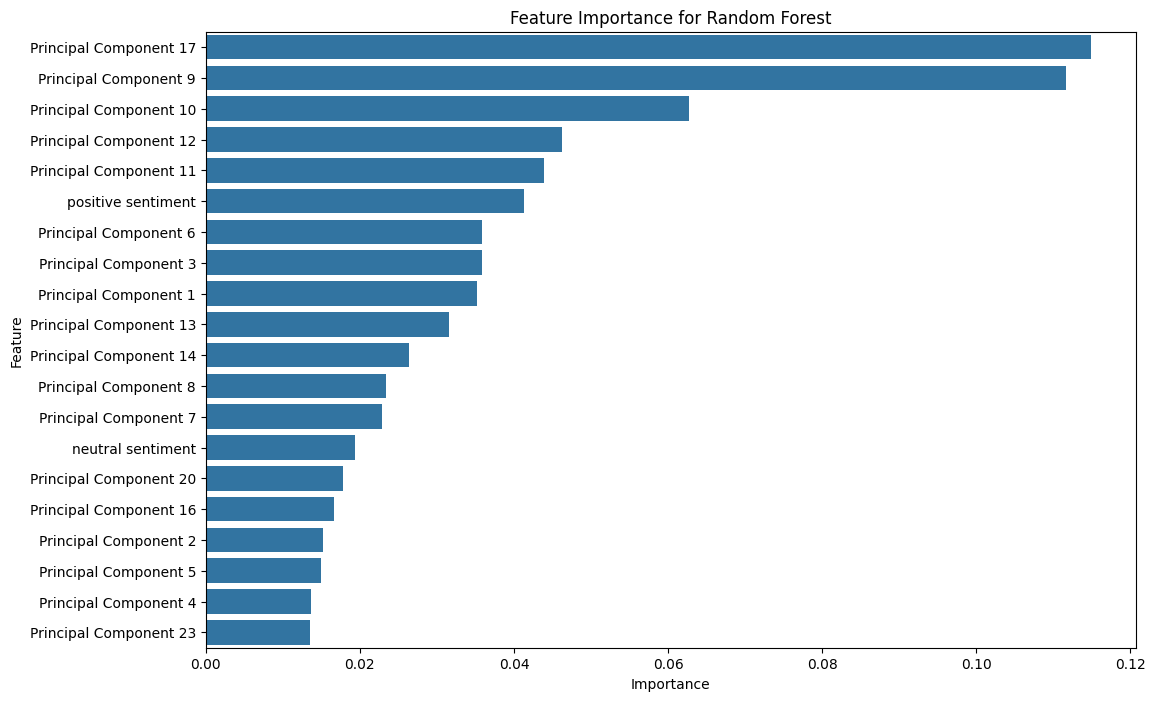

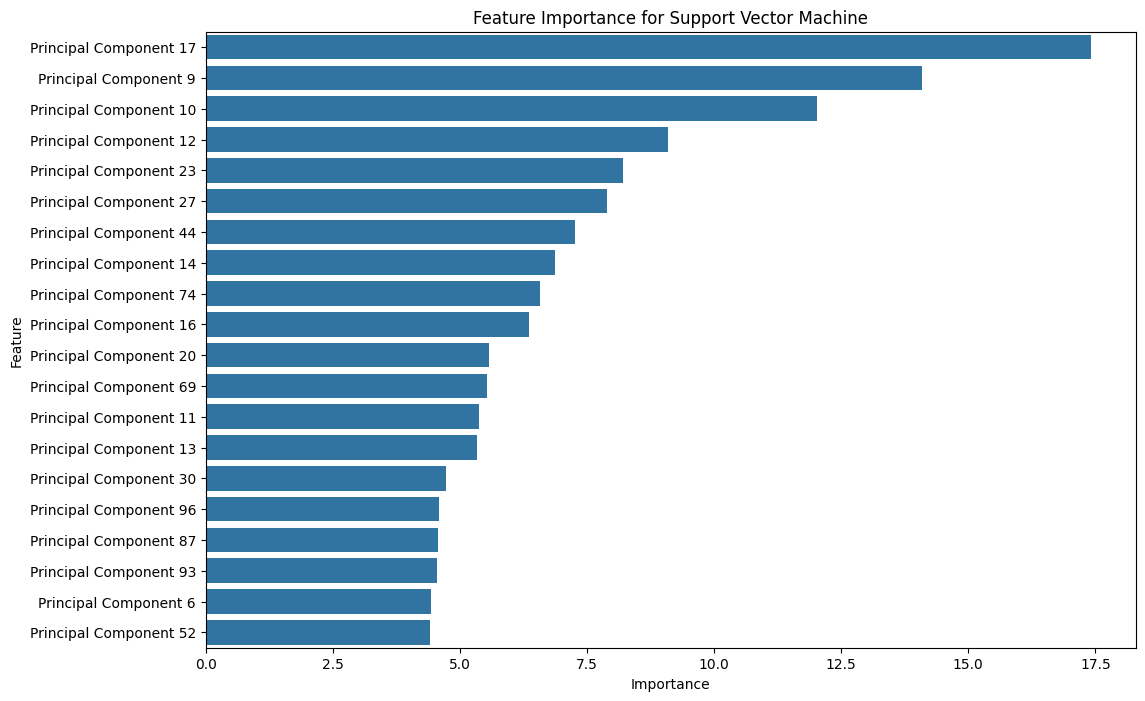

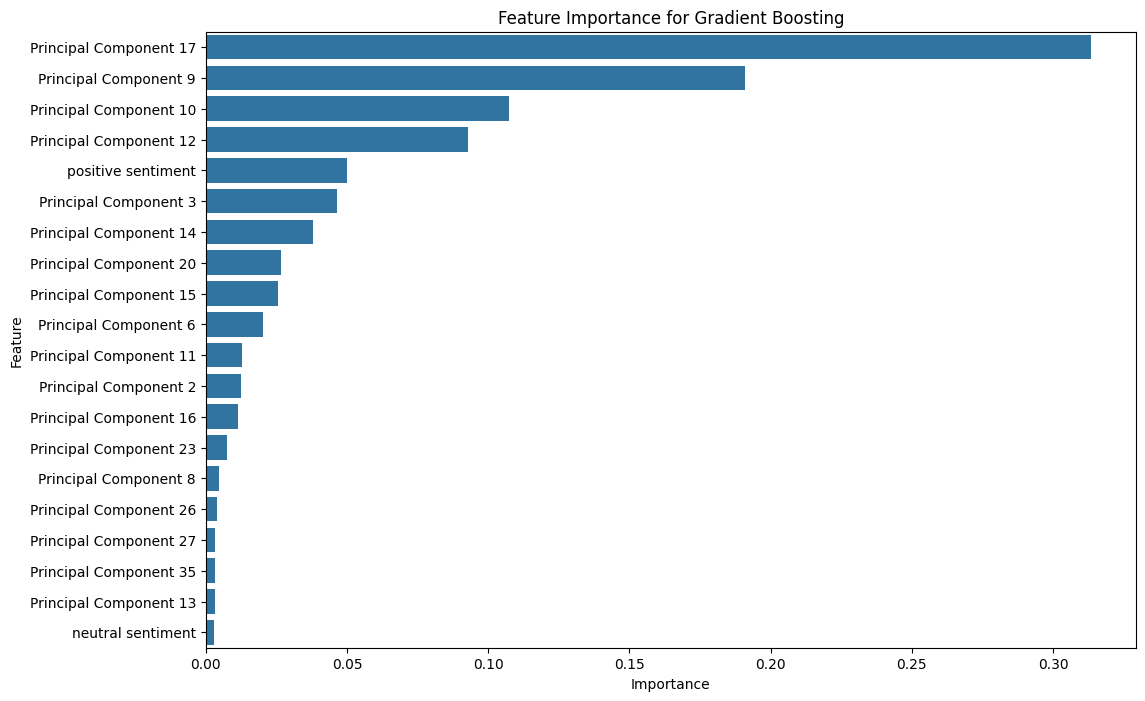

In [ ]:
# Plot feature importance
def plot_feature_importance(model, model_name):
    if model_name == 'Logistic Regression':
        feature_importance = abs(model.coef_[0])
    elif model_name == 'Random Forest' or model_name == 'Gradient Boosting':
        feature_importance = model.feature_importances_
    elif model_name == 'Support Vector Machine' and model.kernel == 'linear':
        feature_importance = abs(model.coef_[0])
    else:
        return  # SVM with non-linear kernel does not have a straightforward feature importance

    # Sort feature importances in descending order
    indices = np.argsort(feature_importance)[::-1]
    # Select the top 20 features
    top_indices = indices[:20]
    top_features = combined_features.columns[top_indices]
    top_importance = feature_importance[top_indices]

    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_importance, y=top_features)
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Plot feature importance for each model
for model_name, model in models.items():
    plot_feature_importance(model, model_name)

The distribution of feature importance suggests that a combination of various principal components and sentiment analysis is essential for the model's performance.

#**Test Set Evaluation:**

## Evaluate Random Forest on the **Test Set**:

In [ ]:
#test_model_names = []
test_results = {}

model = best_models['Random Forest']
model_name = 'Random Forest'

# Evaluate on the test set
rf_y_test_pred = model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_y_test_pred)
rf_test_precision = precision_score(y_test, rf_y_test_pred)
rf_test_recall = recall_score(y_test, rf_y_test_pred)
rf_test_f1 = f1_score(y_test, rf_y_test_pred)

# Store the confusion matrix
rf_test_conf_matrix = confusion_matrix(y_test, rf_y_test_pred)

test_results[model_name] = {
"accuracy": rf_test_accuracy,
"precision": rf_test_precision,
"recall": rf_test_recall,
"f1": rf_test_f1
}

## Evaluate the Neural Network on the **Test Set**:

Make predictions on the **Test Set**:

In [ ]:
# Predict probabilities for the test set
nn_y_test_pred_prob = nn_model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
nn_y_test_pred = (nn_y_test_pred_prob > 0.5).astype(int)


773/773 [==============================] - 2s 2ms/step


In [ ]:
# Evaluate Neural Network
accuracy_nn_t = accuracy_score(y_test_encoded, nn_y_test_pred)
precision_nn_t = precision_score(y_test_encoded, nn_y_test_pred)
recall_nn_t = recall_score(y_test_encoded, nn_y_test_pred)
f1_nn_t = f1_score(y_test_encoded, nn_y_test_pred)
roc_auc_nn_t = roc_auc_score(y_test_encoded, nn_y_test_pred)
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test_encoded)

# Calculate the confusion matrix for the Neural Network model
nn_test_conf_matrix = confusion_matrix(y_test_encoded, nn_y_test_pred)

test_results["Neural Network"] = {
    "accuracy": accuracy_nn_t,
    "precision": precision_nn_t,
    "recall": recall_nn_t,
    "f1": f1_nn_t
}

773/773 [==============================] - 1s 2ms/step - loss: 0.0170 - accuracy: 0.9953


##Models Performance on the Test Set:

###Classification Reports

In [ ]:
# Print classification report
print(f'Accuracy of Random Forest: {rf_test_accuracy:.4f}')
print(classification_report(y_test, rf_y_test_pred))
print('\n' + '='*60 + '\n')

print(f'Accuracy of Neural Network: {accuracy_nn_t:.4f}')
print("Classification Report:")
print(classification_report(y_test_encoded, nn_y_test_pred))



Accuracy of Random Forest: 0.9966
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17416
           1       1.00      0.99      0.99      7315

    accuracy                           1.00     24731
   macro avg       1.00      0.99      1.00     24731
weighted avg       1.00      1.00      1.00     24731



Accuracy of Neural Network: 0.9953
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17416
           1       0.99      0.99      0.99      7315

    accuracy                           1.00     24731
   macro avg       0.99      0.99      0.99     24731
weighted avg       1.00      1.00      1.00     24731



###Confusion Marix

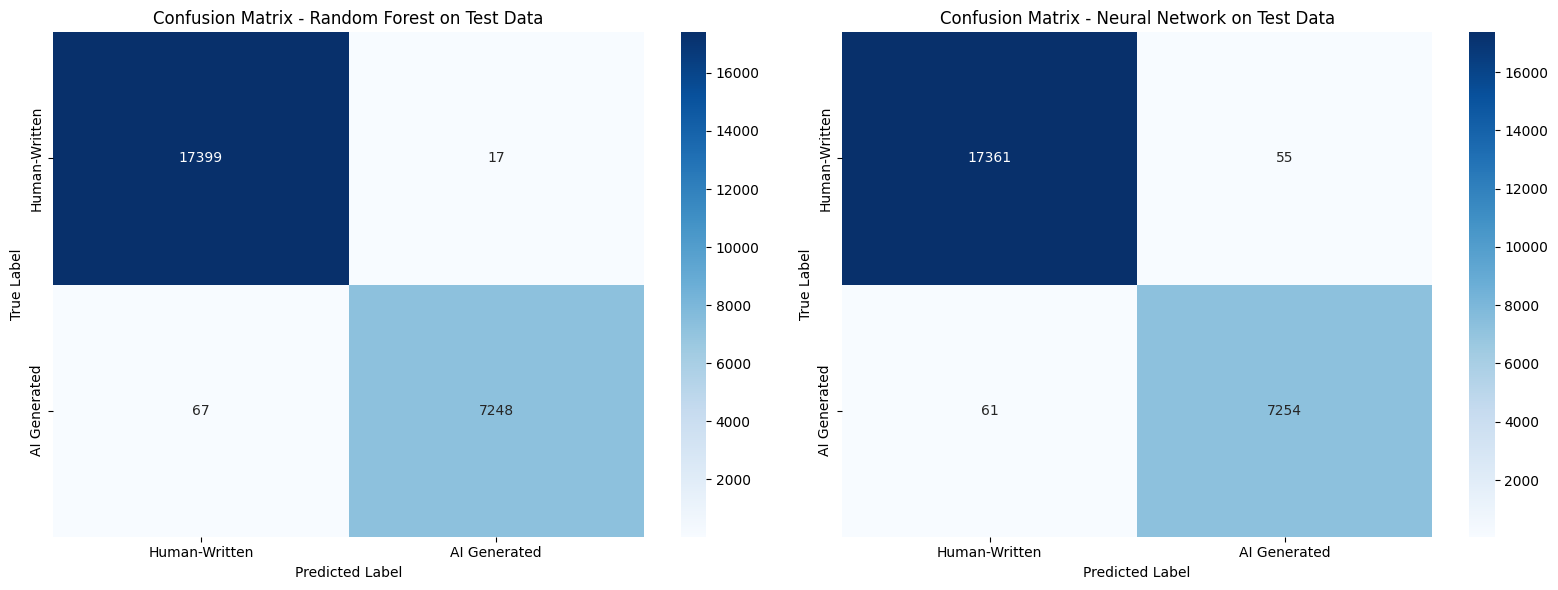

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the confusion matrix for the Random Forest model
sns.heatmap(rf_test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=labels, yticklabels=labels)
axes[0].set_title('Confusion Matrix - Random Forest on Test Data')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plotting the confusion matrix for the Neural Network model
sns.heatmap(nn_test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=labels, yticklabels=labels)
axes[1].set_title('Confusion Matrix - Neural Network on Test Data')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

###Performance Matrics (Test Set):

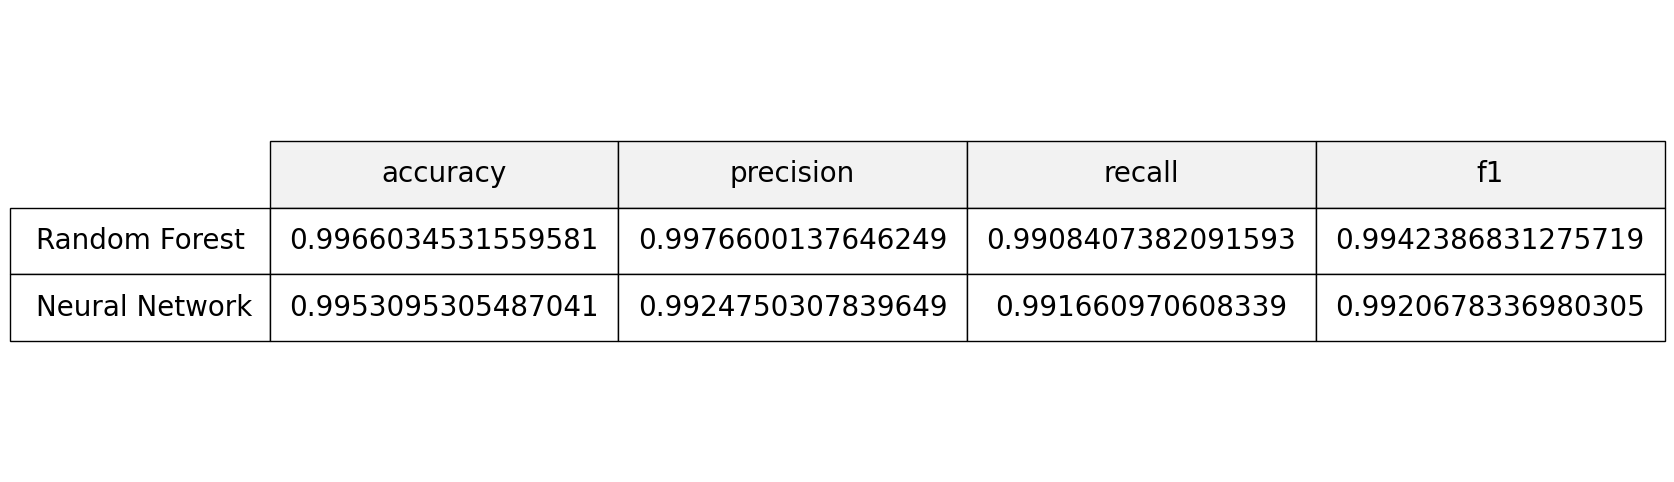

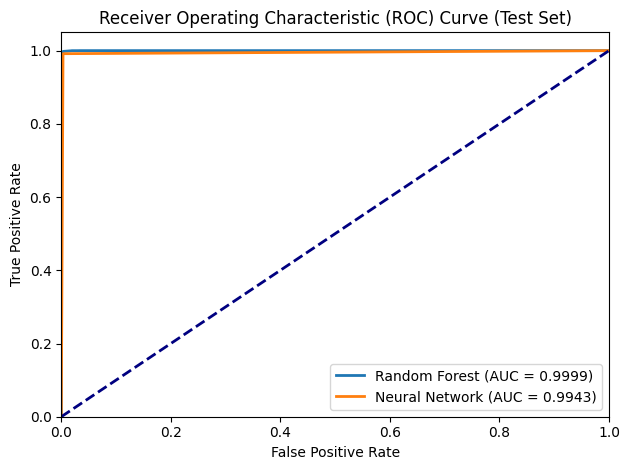

In [ ]:
test_results_df = pd.DataFrame(test_results).T

fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=test_results_df.values,
                 colLabels=test_results_df.columns,
                 rowLabels=test_results_df.index,
                 cellLoc='center',
                 loc='center',
                 colColours=['#f2f2f2']*len(test_results_df.columns))

# Adjust table font size
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(3, 4)  # adjust scale for better readability
plt.show()


# Plot ROC curve for Random Forest
model = best_models['Random Forest']
if hasattr(model, "predict_proba"):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
else:
    y_pred_prob = model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'Random Forest (AUC = {roc_auc:.4f})')

# Plot ROC curve for Neural Network
fpr_nn, tpr_nn, _nn = roc_curve(y_test_encoded, nn_y_test_pred)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.4f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend(loc="lower right")

# Show the plot
plt.tight_layout()
plt.show()

##Choosing the best Model

**Random Forest:**

  *  Shows slightly higher accuracy (0.9966) compared to Neural Network (0.9953).
  *  Achieves the highest precision (0.9977), indicating a low false positive rate.
  *  Has a recall of 0.9908, showing it correctly identifies most of the true positives.
  *  The F1 Score is 0.9942, demonstrating a good balance between precision and recall.
  *  This model shows a slightly higher number of true positives and a slightly lower number of false negatives compared to the Neural Network.
  *  The low number of false positives (17) indicates that the model is very precise, making few mistakes in identifying AI-generated text as human-written.

**Neural Network:**

  *  Has an accuracy of 0.9953, which is very close to Random Forest.
  *  Precision is 0.9925, slightly lower than Random Forest but still very high.
  *  Achieves the highest recall (0.9917), indicating it captures more true positives than Random Forest.
  *  The F1 Score is 0.9921, indicating a strong balance between precision and recall.
  *  This model has a slightly higher number of true negatives and a slightly lower number of false negatives compared to the Random Forest.
  *  Despite having more false positives (55) than the Random Forest, the Neural Network still performs very well, indicating a strong capability to differentiate between human-written and AI-generated texts.

**Conclusions:**
  *  Both models have high true positive and true negative rates, indicating strong performance in correctly identifying both human-written and AI-generated texts.
  *  The Random Forest model is slightly better at minimizing false positives, which means it is more precise in identifying AI-generated text as AI-generated.
  *  The Neural Network model is slightly better at minimizing false negatives, which means it is more sensitive in correctly identifying human-written text as human-written.
  *  The low number of false positives and false negatives for both models highlights their reliability and accuracy.
  

**In summary,  both models perform exceptionally well, with Random Forest having a slight edge in precision and Neural Network having a slight edge in recall. The choice between them should be based on the specific needs of the application, whether the focus is on minimizing false positives or false negatives.**

#Conclusions

**We successfully completed the project, meeting the requirements of the Kaggle task and achieving high percentages of accuracy in the classification tasks.  
The EDA was particularly interesting, yielding valuable insights that informed our approach and contributed to the overall success of the project.  
The Random Forest and Neural Network models were identified as the best performing models, demonstrating their capability to accurately differentiate between human-written and AI-generated texts.**